## Lab 4: Coffee Lovers Unite

### Coffee Lovers Unite!

If caffeine is one of the most popular drugs, then coffee is likely one of the most popular delivery systems for it. Aside from caffeine, people enjoy the wonderful variety of coffee-related drinks. Let’s do a rough investigation of the “market share” by two of the top coffee chains in the United States!

World Population Review provides some great data on store locations and chain prevalence. Check out [this page](https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state) for the Starbucks Coffee locations in the United States. Notice that this page only really gives the name of the state and the number of locations in that state.

### Scrape the Location Counts


1.   Use the `beautifulsoup` library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:
*   Starbucks
*   Dunkin’ Donuts









### Starbucks

In [1]:
!pip install requests beautifulsoup4 pandas


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", attrs={"class": ['wpr-table']})

if table is None:
    print("Table not found")
else:
    rows = []

    for row in table.find_all("tr")[1:]:
        cells = row.find_all("td")

        if len(cells) >= 3:
            State = row.find('th').get_text(strip=True)
            Starbucks_Stores_2023 = cells[0].get_text(strip=True)
            Starbucks_Stores_2021 = cells[1].get_text(strip=True)
            Starbucks_Stores_2024 = cells[2].get_text(strip=True)

            rows.append({
                "State": State,
                "2021": Starbucks_Stores_2021,
                "2023": Starbucks_Stores_2023,
                "2024": Starbucks_Stores_2024
            })

    df = pd.DataFrame(rows)
df

,State,2021,2023,2024
0,California,"2,959","3,080","3,117"
1,Texas,"1,215","1,346","1,409"
2,Florida,786,844,892
3,Washington,739,741,736
4,New York,643,692,715
5,Illinois,621,677,685
6,Arizona,535,548,579
7,Colorado,497,495,506
8,Ohio,446,491,499
9,Virginia,456,489,510


In [23]:
starbucks_clean = pd.melt(df, id_vars=['State'], var_name='Year', value_name='Starbucks Stores')


starbucks_clean['Year'] = starbucks_clean['Year'].str.extract(r'(\d{4})')


starbucks_clean['Starbucks Stores'] = pd.to_numeric(starbucks_clean['Starbucks Stores'].astype(str).str.replace(',', ''), errors='coerce').fillna(0).astype(int)

starbucks_clean

,State,Year,Starbucks Stores
0,California,2021,2959
1,Texas,2021,1215
2,Florida,2021,786
3,Washington,2021,739
4,New York,2021,643
...,...,...,...
148,South Dakota,2024,0
149,West Virginia,2024,0
150,Wyoming,2024,0
151,North Dakota,2024,0


In [24]:

total_starbucks_stores = starbucks_clean['Starbucks Stores'].sum()
print(f"Total Starbucks stores: {total_starbucks_stores}")

Total Starbucks stores: 39304
Total Starbucks stores: 39304


In [ ]:


starbucks_clean.iloc[100]

In [25]:
starbucks_clean.iloc[[5,100]]

,State,Year,Starbucks Stores
5,Illinois,2021,621
100,North Dakota,2023,13


In [26]:
starbucks_clean.dtypes


State               object
Year                object
Starbucks Stores     int64
dtype: object

### Dunkin' Donuts

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the webpage
url = "https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", attrs={"class": ['wpr-table']})

if table is None:
    print("Table not found")
else:
    rows = []

    for row in table.find_all("tr")[1:]:
        cells = row.find_all("td")

        if len(cells) >= 2:
            State = row.find('th').get_text(strip=True)
            Dunkin_Stores_2023 = cells[1].get_text(strip=True)
            Dunkin_Stores_2024 = cells[0].get_text(strip=True)

            rows.append({
                "State": State,
                "2023": Dunkin_Stores_2023,
                "2024": Dunkin_Stores_2024,
            })

    df1 = pd.DataFrame(rows)
df1

,State,2023,2024
0,New York,"1,414","1,431"
1,Massachusetts,"1,068","1,042"
2,Florida,883,909
3,New Jersey,866,872
4,Illinois,692,711
5,Pennsylvania,629,650
6,Connecticut,480,476
7,Maryland,303,311
8,Georgia,265,287
9,Ohio,245,261


In [30]:
dunkin_clean = pd.melt(df1, id_vars=['State'], var_name='Year', value_name='Dunkin Donuts Stores')

dunkin_clean['Year'] = dunkin_clean['Year'].str.extract(r'(\d{4})')

dunkin_clean['Dunkin Donuts Stores'] = pd.to_numeric(dunkin_clean['Dunkin Donuts Stores'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Display the tidy DataFrame
dunkin_clean



,State,Year,Dunkin Donuts Stores
0,New York,2023,1414
1,Massachusetts,2023,1068
2,Florida,2023,883
3,New Jersey,2023,866
4,Illinois,2023,692
...,...,...,...
97,Montana,2024,0
98,North Dakota,2024,0
99,Oregon,2024,0
100,South Dakota,2024,0


In [31]:
total_dunkin_stores = dunkin_clean['Dunkin Donuts Stores'].sum()
print(f"Total Dunkin Donuts Stores: {total_dunkin_stores}")

Total Dunkin Donuts Stores: 19027
Total Dunkin Donuts Stores: 19027


In [ ]:
dunkin_clean.iloc[100]

In [32]:
dunkin_clean.dtypes

State                   object
Year                    object
Dunkin Donuts Stores     int64
dtype: object

2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [35]:
starbucks = pd.melt(df, id_vars='State', value_vars=['2021', '2023', '2024'], var_name = 'Year', value_name = 'Store Count')

starbucks['Brand'] = 'Starbucks'


dunkin = pd.melt(df1, id_vars='State', value_vars=['2023', '2024'], var_name = 'Year', value_name = 'Store Count')

dunkin['Brand'] = 'Dunkin Donut'

merged_df = pd.concat([starbucks, dunkin], axis=0, ignore_index=True)

merged_df


,State,Year,Store Count,Brand
0,California,2021,"2,959",Starbucks
1,Texas,2021,"1,215",Starbucks
2,Florida,2021,786,Starbucks
3,Washington,2021,739,Starbucks
4,New York,2021,643,Starbucks
...,...,...,...,...
250,Montana,2024,0,Dunkin Donut
251,North Dakota,2024,0,Dunkin Donut
252,Oregon,2024,0,Dunkin Donut
253,South Dakota,2024,0,Dunkin Donut


In [36]:
# test tidy data

merged_df.iloc[100]

State          North Dakota
Year                   2023
Store Count              13
Brand             Starbucks
Name: 100, dtype: object

In [37]:
merged_df.dtypes

State          object
Year           object
Store Count    object
Brand          object
dtype: object

### Supplemental Data

4. Scrape the state names and populations from this [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population) page. Merge these data with your coffee dataset.



In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", attrs={"class": ['wikitable sortable']})

if table is None:
    print("Table not found")
else:
    state_data = []

    for row in table.find_all("tr")[1:]:
        cells = row.find_all("td")

        if len(cells) >= 4:

            state = cells[2].get_text(strip=True)
            population = cells[3].get_text(strip=True).replace(',', '')

            if population.isdigit():
                state_data.append({
                    "State": state,
                    "Population": int(population)
                })
            else:
                print(f"Skipping non-numeric population for state: {state}")


    statepop_df = pd.DataFrame(state_data)

statepop_df = statepop_df.rename(columns={"Population": "Population 2020"})

statepop_df

,State,Population 2020
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [40]:


coffee_df = pd.merge(starbucks_clean, dunkin_clean, on=['State', 'Year'], how='outer')

coffee_population_df = pd.merge(coffee_df, statepop_df, on='State', how='left')

coffee_population_df['Dunkin Donuts Stores'] = coffee_population_df['Dunkin Donuts Stores'].apply(lambda x: int(x) if not pd.isna(x) else x)

coffee_population_df


,State,Year,Starbucks Stores,Dunkin Donuts Stores,Population 2020
0,Alabama,2021,99,NaN,5024279
1,Alabama,2023,85,59.0,5024279
2,Alabama,2024,0,69.0,5024279
3,Alaska,2021,49,NaN,733391
4,Alaska,2023,49,0.0,733391
...,...,...,...,...,...
148,Wisconsin,2023,145,83.0,5893718
149,Wisconsin,2024,0,100.0,5893718
150,Wyoming,2021,26,NaN,576851
151,Wyoming,2023,23,1.0,576851


5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.



In [41]:
# Starbucks Revenue from 2021 and 2023
# https://stockanalysis.com/stocks/sbux/revenue/
# Starbucks Revenue from 2024
# https://stories.starbucks.com/press/2024/starbucks-reports-preliminary-q4-and-full-fiscal-year-2024-results/

# Starbucks Revenue Data (Manually entered)
starbucks_revenue = {
    '2021': 29.06,  # In billions of USD
    '2023': 35.98,
    '2024': 36.2
}


# Dunkin Donuts Revenue from 2023
# https://www.zippia.com/dunkin-donuts-careers-554008/revenue/
# # Dunkin Donuts Estimated Revenue from 2023
# https://companiesmarketcap.com/dunkin-brands/revenue/

# Dunkin' Revenue Data (Manually entered)
dunkin_revenue = {
    '2023': 1.4,  # In billions of USD
    '2024': 1.25
}

starbucks_revenue_df = pd.DataFrame(list(starbucks_revenue.items()), columns=['Year', 'Yearly Starbucks Revenue'])
dunkin_revenue_df = pd.DataFrame(list(dunkin_revenue.items()), columns=['Year', 'Yearly Dunkin Revenue'])

starbucks_revenue_df['Year'] = starbucks_revenue_df['Year'].astype(str)
dunkin_revenue_df['Year'] = dunkin_revenue_df['Year'].astype(str)


coffee_population_df = pd.merge(coffee_population_df, starbucks_revenue_df, on='Year', how='left')

coffee_population_df = pd.merge(coffee_population_df, dunkin_revenue_df, on='Year', how='left')



coffee_population_df

,State,Year,Starbucks Stores,Dunkin Donuts Stores,Population 2020,Yearly Starbucks Revenue,Yearly Dunkin Revenue
0,Alabama,2021,99,NaN,5024279,29.06,NaN
1,Alabama,2023,85,59.0,5024279,35.98,1.40
2,Alabama,2024,0,69.0,5024279,36.20,1.25
3,Alaska,2021,49,NaN,733391,29.06,NaN
4,Alaska,2023,49,0.0,733391,35.98,1.40
...,...,...,...,...,...,...,...
148,Wisconsin,2023,145,83.0,5893718,35.98,1.40
149,Wisconsin,2024,0,100.0,5893718,36.20,1.25
150,Wyoming,2021,26,NaN,576851,29.06,NaN
151,Wyoming,2023,23,1.0,576851,35.98,1.40


In [42]:
starbucks_revenue = {
    '2021': 29.06,
    '2023': 35.98,
    '2024': 36.2
}
dunkin_revenue = {
    '2023': 1.4,
    '2024': 1.25
}

# Total number of stores for each company
total_starbucks_stores = 39304
total_dunkin_stores = 19027

# Calculate average revenue per store for each year (in million USD)
starbucks_revenue_per_store = {
    year: (revenue * 1e9) / total_starbucks_stores for year, revenue in starbucks_revenue.items()
}
dunkin_revenue_per_store = {
    year: (revenue * 1e9) / total_dunkin_stores for year, revenue in dunkin_revenue.items()
}

coffee_population_df['Year'] = coffee_population_df['Year'].astype(str)

coffee_population_df['Estimated Starbucks Revenue'] = coffee_population_df.apply(
    lambda row: round(row['Starbucks Stores'] * starbucks_revenue_per_store.get(row['Year'], 0), 2), axis=1
)
coffee_population_df['Estimated Dunkin Revenue'] = coffee_population_df.apply(
    lambda row: round(row['Dunkin Donuts Stores'] * dunkin_revenue_per_store.get(row['Year'], 0), 2), axis=1
)

coffee_population_df



,State,Year,Starbucks Stores,Dunkin Donuts Stores,Population 2020,Yearly Starbucks Revenue,Yearly Dunkin Revenue,Estimated Starbucks Revenue,Estimated Dunkin Revenue
0,Alabama,2021,99,NaN,5024279,29.06,NaN,7.319713e+07,NaN
1,Alabama,2023,85,59.0,5024279,35.98,1.40,7.781142e+07,4341199.35
2,Alabama,2024,0,69.0,5024279,36.20,1.25,0.000000e+00,4533032.01
3,Alaska,2021,49,NaN,733391,29.06,NaN,3.622888e+07,NaN
4,Alaska,2023,49,0.0,733391,35.98,1.40,4.485599e+07,0.00
...,...,...,...,...,...,...,...,...,...
148,Wisconsin,2023,145,83.0,5893718,35.98,1.40,1.327371e+08,6107110.95
149,Wisconsin,2024,0,100.0,5893718,36.20,1.25,0.000000e+00,6569611.60
150,Wyoming,2021,26,NaN,576851,29.06,NaN,1.922349e+07,NaN
151,Wyoming,2023,23,1.0,576851,35.98,1.40,2.105485e+07,73579.65


6. Create a region variable in your dataset according to the scheme on this [wikipedia page](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States): Northeast, Midwest, South, West. You
do not need to scrape this information.



In [43]:

region_mapping = {
    'Northeast': {
        'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
        'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
        'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    },
    'Midwest': {
        'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
        'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest',
        'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    },
    'South': {
        'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
        'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South', 'Washington, D.C': 'South',
        'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
        'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South',
        'Texas': 'South',
    },
    'West': {
        'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West',
        'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
        'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
    }
}

def get_region(state):
    """Maps a state to its corresponding region."""
    for region, states in region_mapping.items():
        if state in states:
            return region
    return None

coffee_population_df['Region'] = coffee_population_df['State'].apply(get_region)

coffee_population_df

,State,Year,Starbucks Stores,Dunkin Donuts Stores,Population 2020,Yearly Starbucks Revenue,Yearly Dunkin Revenue,Estimated Starbucks Revenue,Estimated Dunkin Revenue,Region
0,Alabama,2021,99,NaN,5024279,29.06,NaN,7.319713e+07,NaN,South
1,Alabama,2023,85,59.0,5024279,35.98,1.40,7.781142e+07,4341199.35,South
2,Alabama,2024,0,69.0,5024279,36.20,1.25,0.000000e+00,4533032.01,South
3,Alaska,2021,49,NaN,733391,29.06,NaN,3.622888e+07,NaN,West
4,Alaska,2023,49,0.0,733391,35.98,1.40,4.485599e+07,0.00,West
...,...,...,...,...,...,...,...,...,...,...
148,Wisconsin,2023,145,83.0,5893718,35.98,1.40,1.327371e+08,6107110.95,Midwest
149,Wisconsin,2024,0,100.0,5893718,36.20,1.25,0.000000e+00,6569611.60,Midwest
150,Wyoming,2021,26,NaN,576851,29.06,NaN,1.922349e+07,NaN,West
151,Wyoming,2023,23,1.0,576851,35.98,1.40,2.105485e+07,73579.65,West


## Analyze

### 7. Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):



*  Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states.





In [44]:
import pandas as pd
from plotnine import *



melted_df = coffee_population_df.melt(
    id_vars=['State', 'Year', 'Region'],
    value_vars=['Starbucks Stores', 'Dunkin Donuts Stores'],
    var_name='Brand',
    value_name='num_stores'
)



state_brand_data = melted_df.groupby(['State', 'Brand'])['num_stores'].mean().reset_index()
state_brand_data



,State,Brand,num_stores
0,Alabama,Dunkin Donuts Stores,64.000000
1,Alabama,Starbucks Stores,61.333333
2,Alaska,Dunkin Donuts Stores,0.000000
3,Alaska,Starbucks Stores,32.666667
4,Arizona,Dunkin Donuts Stores,106.000000
...,...,...,...
97,West Virginia,Starbucks Stores,29.666667
98,Wisconsin,Dunkin Donuts Stores,91.500000
99,Wisconsin,Starbucks Stores,107.000000
100,Wyoming,Dunkin Donuts Stores,1.000000


/opt/anaconda3/lib/python3.12/site-packages/plotnine/themes/themeable.py:2419: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


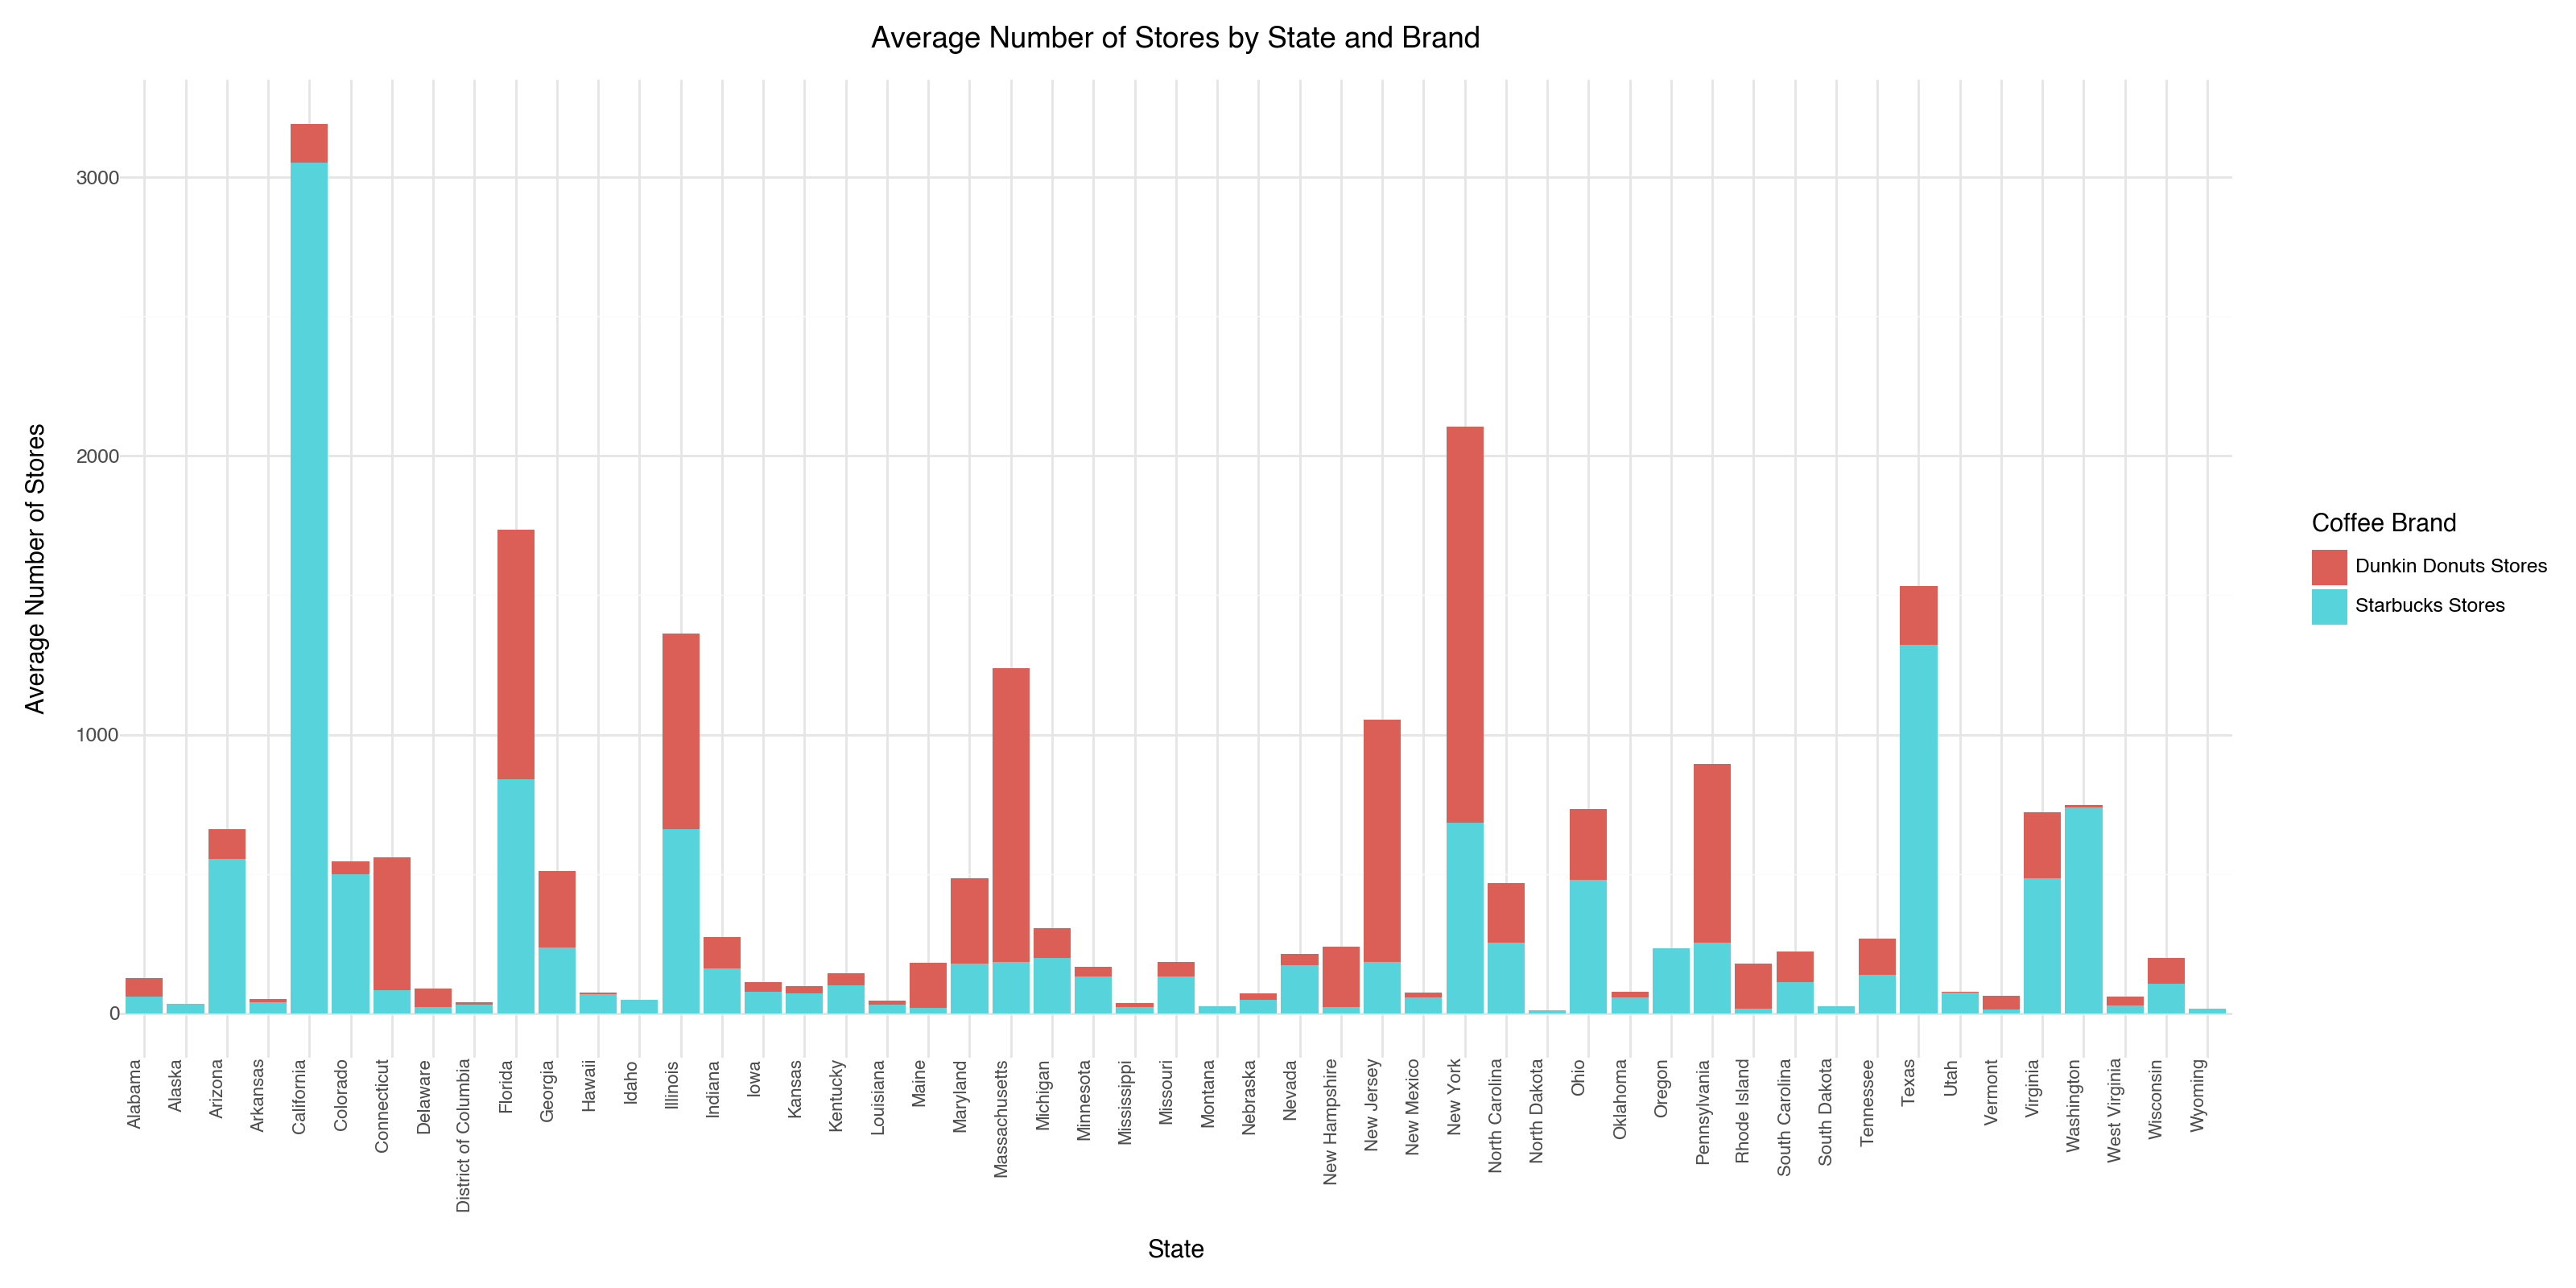

In [45]:

from plotnine import *

(
    ggplot(state_brand_data, aes(x='State', y='num_stores', fill='Brand')) +
    geom_bar(stat='identity', position='stack') +
    labs(title='Average Number of Stores by State and Brand',
         x='State', y='Average Number of Stores') +
    theme_minimal() +
    theme(
        legend_title=element_text(text='Coffee Brand'),
        axis_text_x=element_text(rotation=90, hjust=1, size=8),
        figure_size=(16, 8),
        subplots_adjust={'bottom': 0.3}
    )
)


### **State-Level Insights:**

Starbucks, with a total of **39,304 stores**, and Dunkin' Donuts, with **19,027 stores**, exhibit distinct regional patterns shaped by their historical roots and market strategies. Starbucks, founded in **Seattle, Washington** on the West Coast, has a much stronger presence in **California**, **Washington**, and **Texas**. The brand's dominance in these states, particularly California with over 3,000 stores, reflects the influence of the West Coast’s coffee culture on Starbucks' expansion. In contrast, Dunkin' Donuts, founded in **Quincy, Massachusetts**, shows a significant concentration of stores in the **Northeast**, including **Massachusetts**, **New York**, **New Jersey**, and **Connecticut**. These states are clear examples of the brand's strong regional presence, with Dunkin' Donuts often outnumbering Starbucks despite having **fewer stores overall**. Massachusetts, in particular, stands out as a Dunkin' stronghold, aligning with the brand's origins and deep-rooted popularity among locals.

In states such as **Georgia**, **Florida**, and **Illinois**, both Starbucks and Dunkin' Donuts maintain a relatively balanced presence, indicating active competition in these markets. However, both brands have limited or no presence in sparsely populated states like **Montana**, **North Dakota**, and **Wyoming**, showing that population density and market demand play key roles in expansion strategies. Starbucks’ dominance in the **West** and **South** regions, alongside Dunkin's concentration in the **Northeast**, highlights how these brands have grown along historically significant lines. Despite Dunkin' Donuts having fewer stores overall, it has maintained a competitive edge in the Northeast through strong brand loyalty and regional identity. These patterns emphasize how both Starbucks and Dunkin' Donuts have built their market presence by leveraging their **regional origins** and aligning with local consumer preferences.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 4 rows containing missing values.


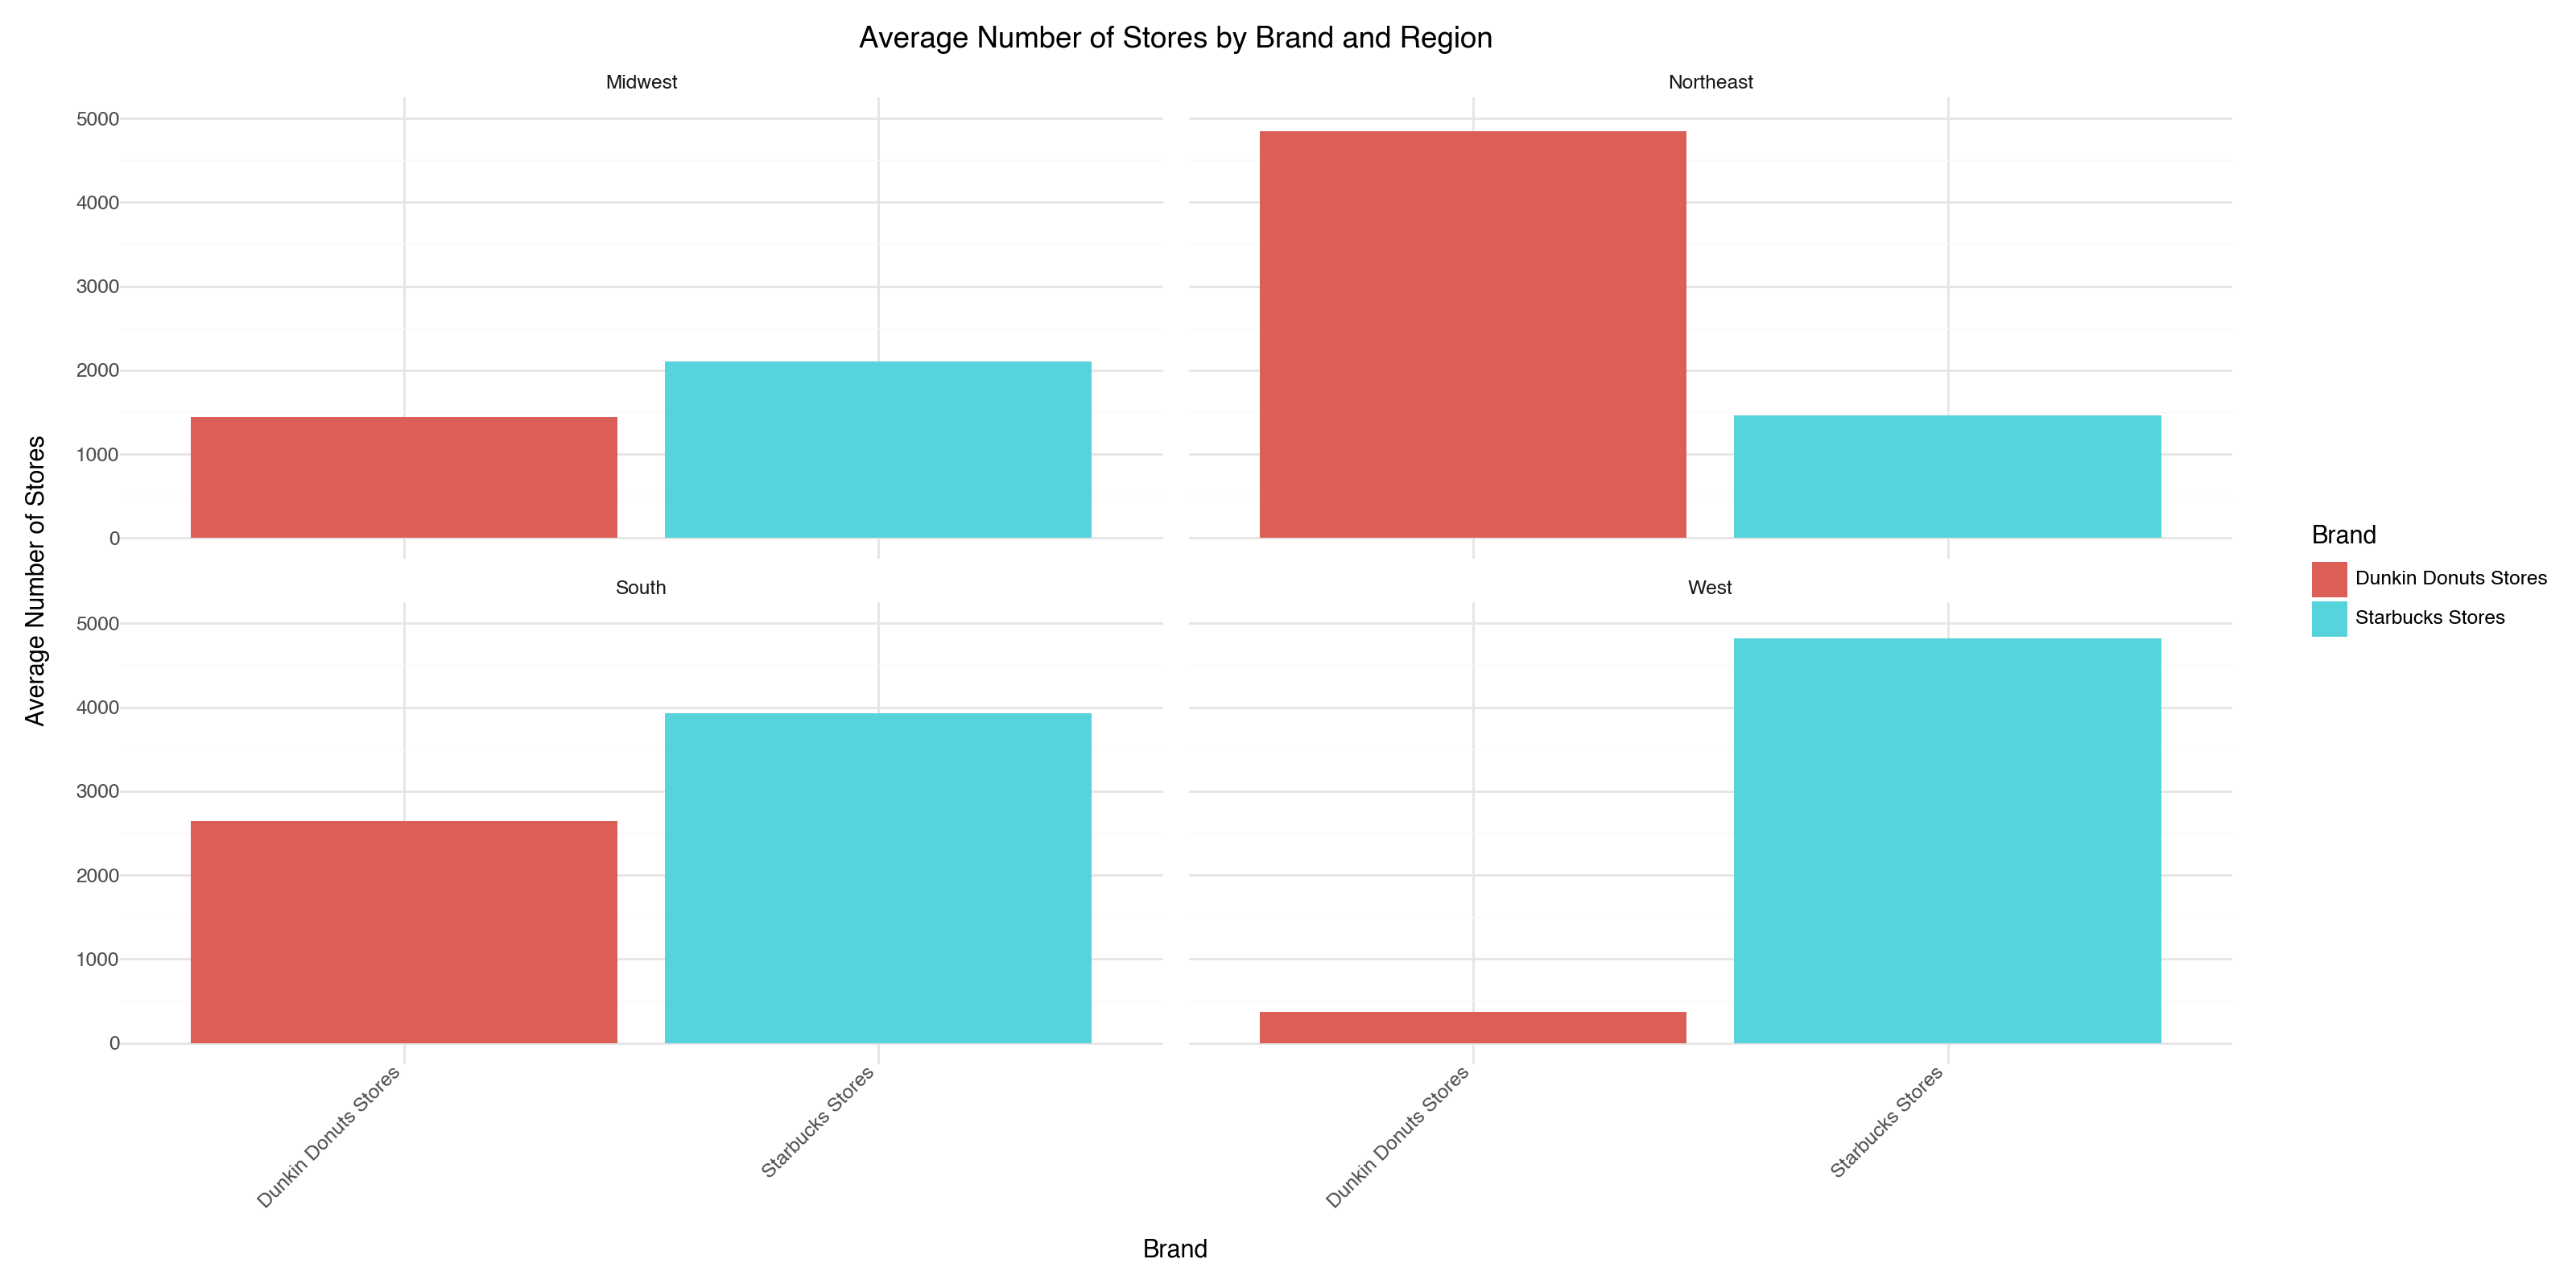

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 4 rows containing missing values.


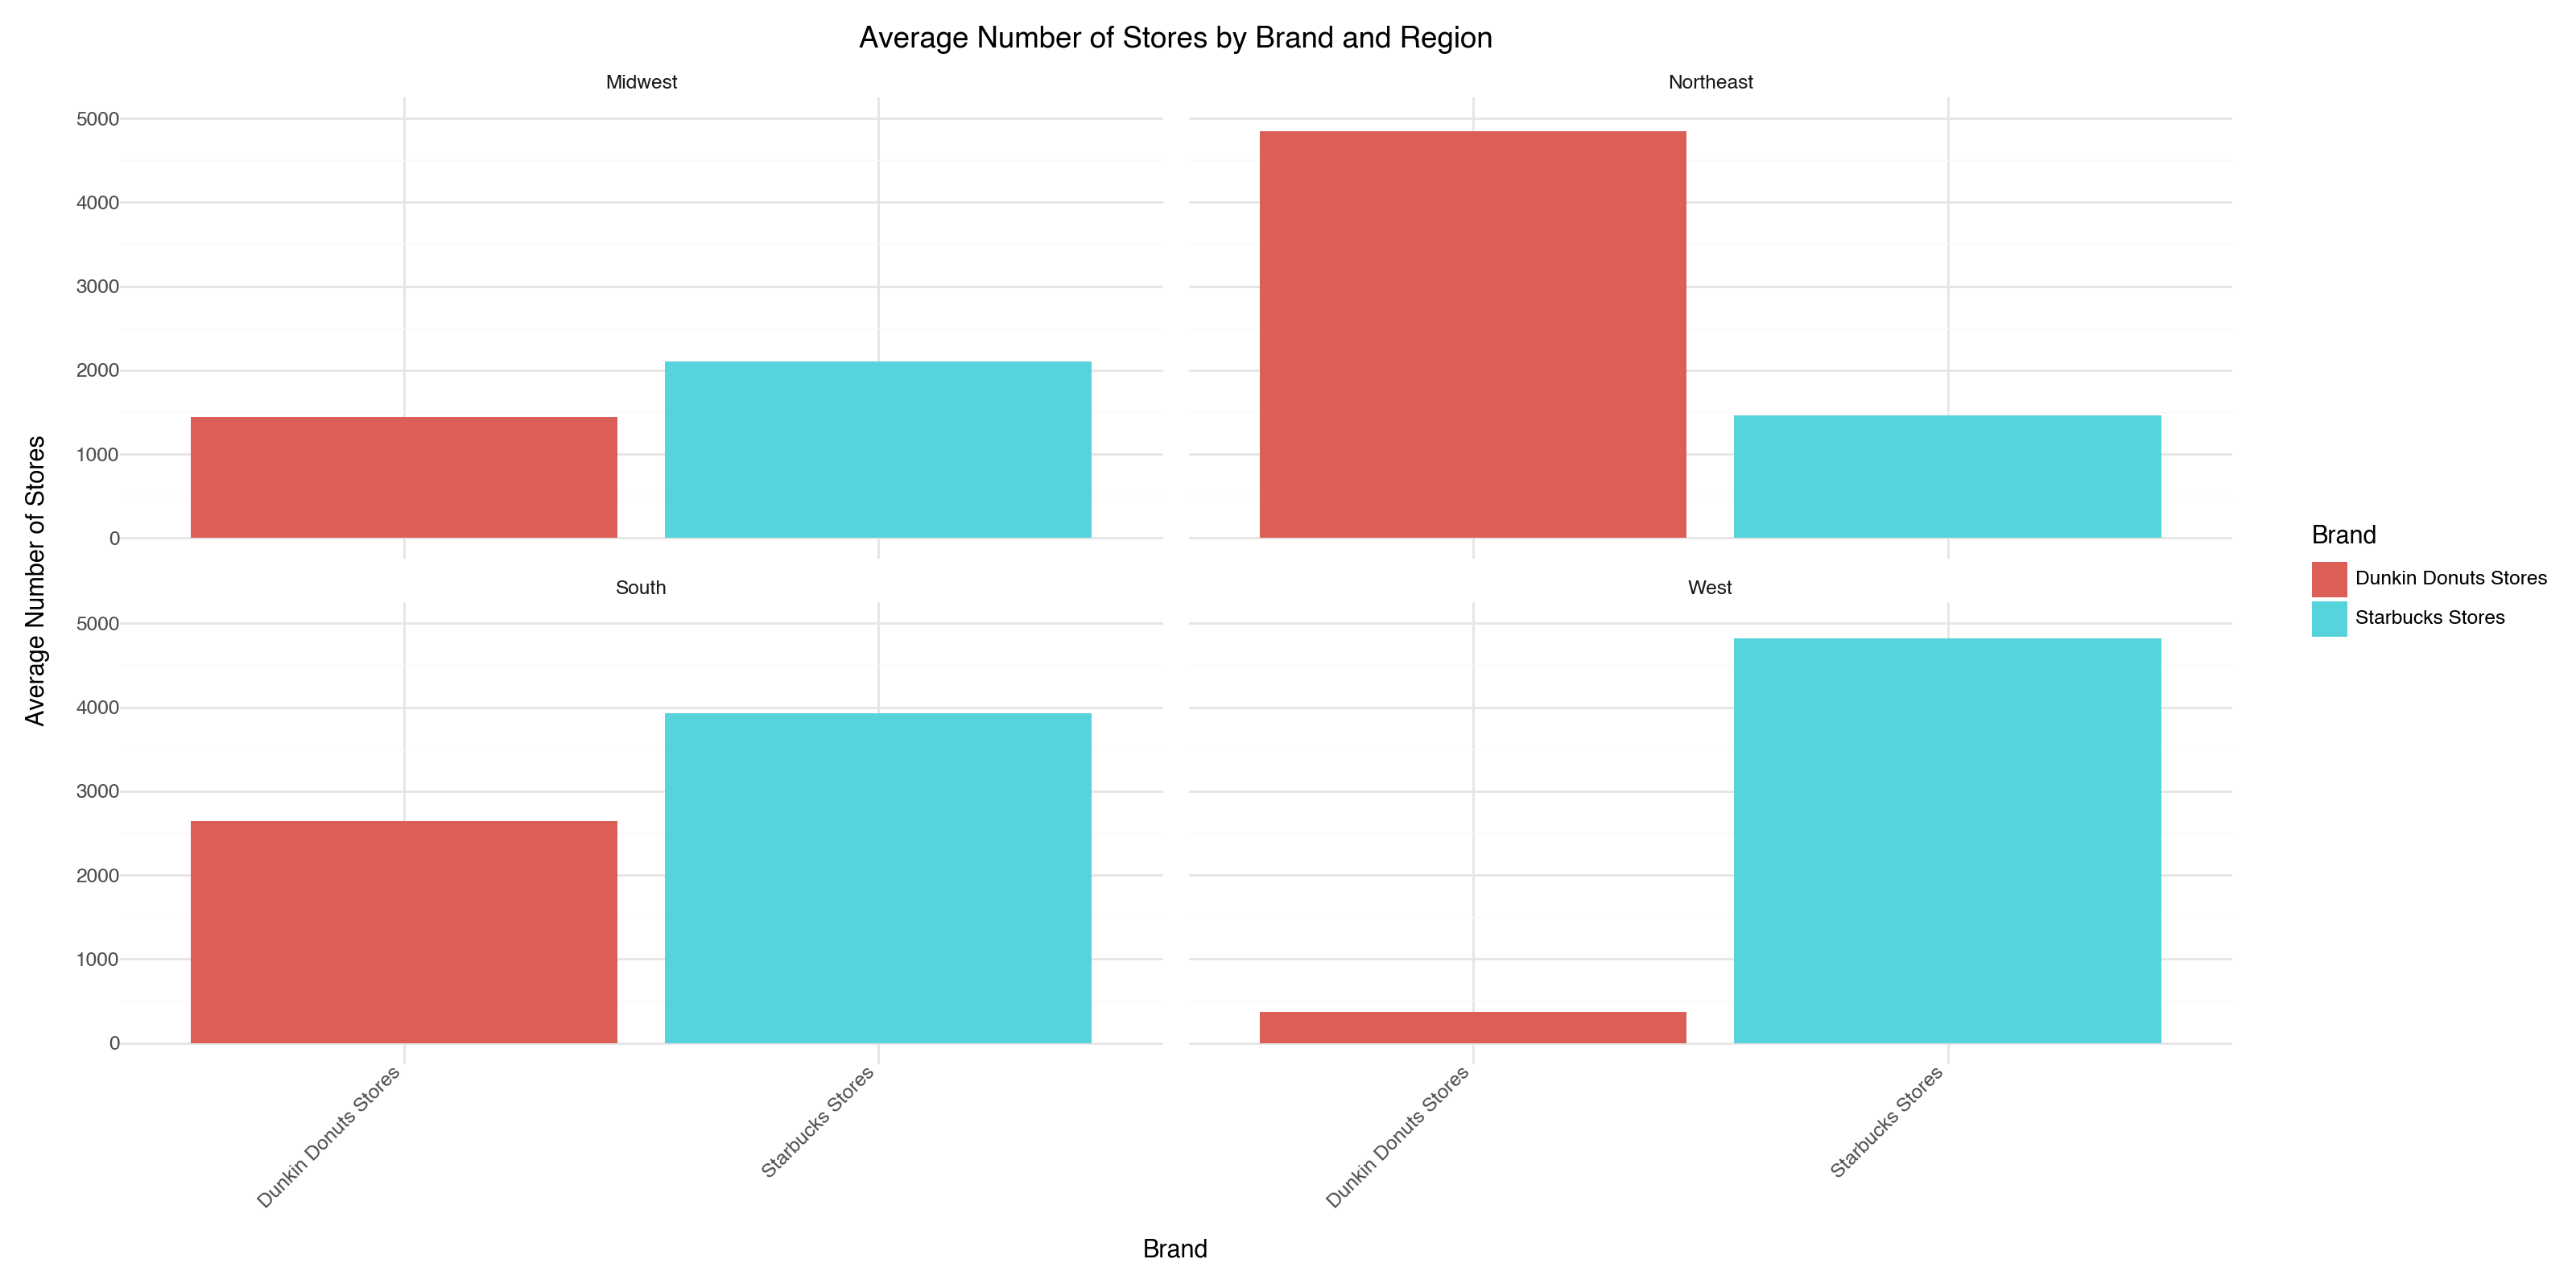

In [46]:


melted_df = coffee_population_df.melt(
    id_vars=['State', 'Year', 'Region'],
    value_vars=['Starbucks Stores', 'Dunkin Donuts Stores'],
    var_name='Brand',
    value_name='num_stores'
)

state_brand_data = melted_df.groupby(['State', 'Brand'])['num_stores'].mean().reset_index()

region_mapping_flat = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'Washington, D.C': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South',
    'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
}

state_brand_data['Region'] = state_brand_data['State'].map(region_mapping_flat)

state_brand_data_clean = state_brand_data.dropna(subset=['Region'])

from plotnine import *

plot = (
    ggplot(state_brand_data_clean, aes(x='Brand', y='num_stores', fill='Brand')) +
    geom_bar(stat='identity', position='stack') +
    facet_wrap('~Region', ncol=2) +
    labs(title='Average Number of Stores by Brand and Region',
         x='Brand', y='Average Number of Stores') +
    scale_y_continuous(limits=[0, 5000]) +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_title=element_text(text='Brand'),
        figure_size=(16, 8)
    )
)



plot

### **Regional-Level Insights**

The regional distribution of Starbucks and Dunkin' Donuts reveals distinct patterns in their market presence, influenced by their brand origins and strategic expansion. In the **Northeast**, Dunkin' Donuts dominates with the largest number of stores, aligning with its roots in Quincy, Massachusetts. The brand has maintained strong regional loyalty, reinforcing its prominence in this region. Starbucks, though present in the Northeast, has a comparatively smaller footprint.

In contrast, **Starbucks holds a commanding presence in the West**, where it was founded in Seattle, Washington. The West Coast’s coffee culture has contributed to Starbucks' significant market penetration, while Dunkin' Donuts has a minimal presence in this region.

In the **South** and **Midwest**, both brands exhibit strong competition, although Starbucks maintains a slight edge in both regions. Starbucks’ broader market appeal and association with urban and suburban environments have allowed it to expand effectively in these regions. Dunkin' Donuts, despite having fewer stores overall compared to Starbucks, has managed to secure a competitive position in the South and Midwest, likely leveraging its reputation for quick-service coffee and breakfast.

This analysis highlights how both brands capitalize on their regional strengths—Dunkin' Donuts in the Northeast and Starbucks in the West—while competing in other markets with varying degrees of success. Starbucks, with its larger global footprint, maintains a stronger presence in most regions, but Dunkin' Donuts' deep-rooted loyalty in the Northeast ensures its dominance in that region despite having fewer stores overall.

* How does your chosen financial metric change by state and region for each chain? For example, having 5 stores in California is very different from having 5 stores in Wyoming.



/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 51 rows containing missing values.


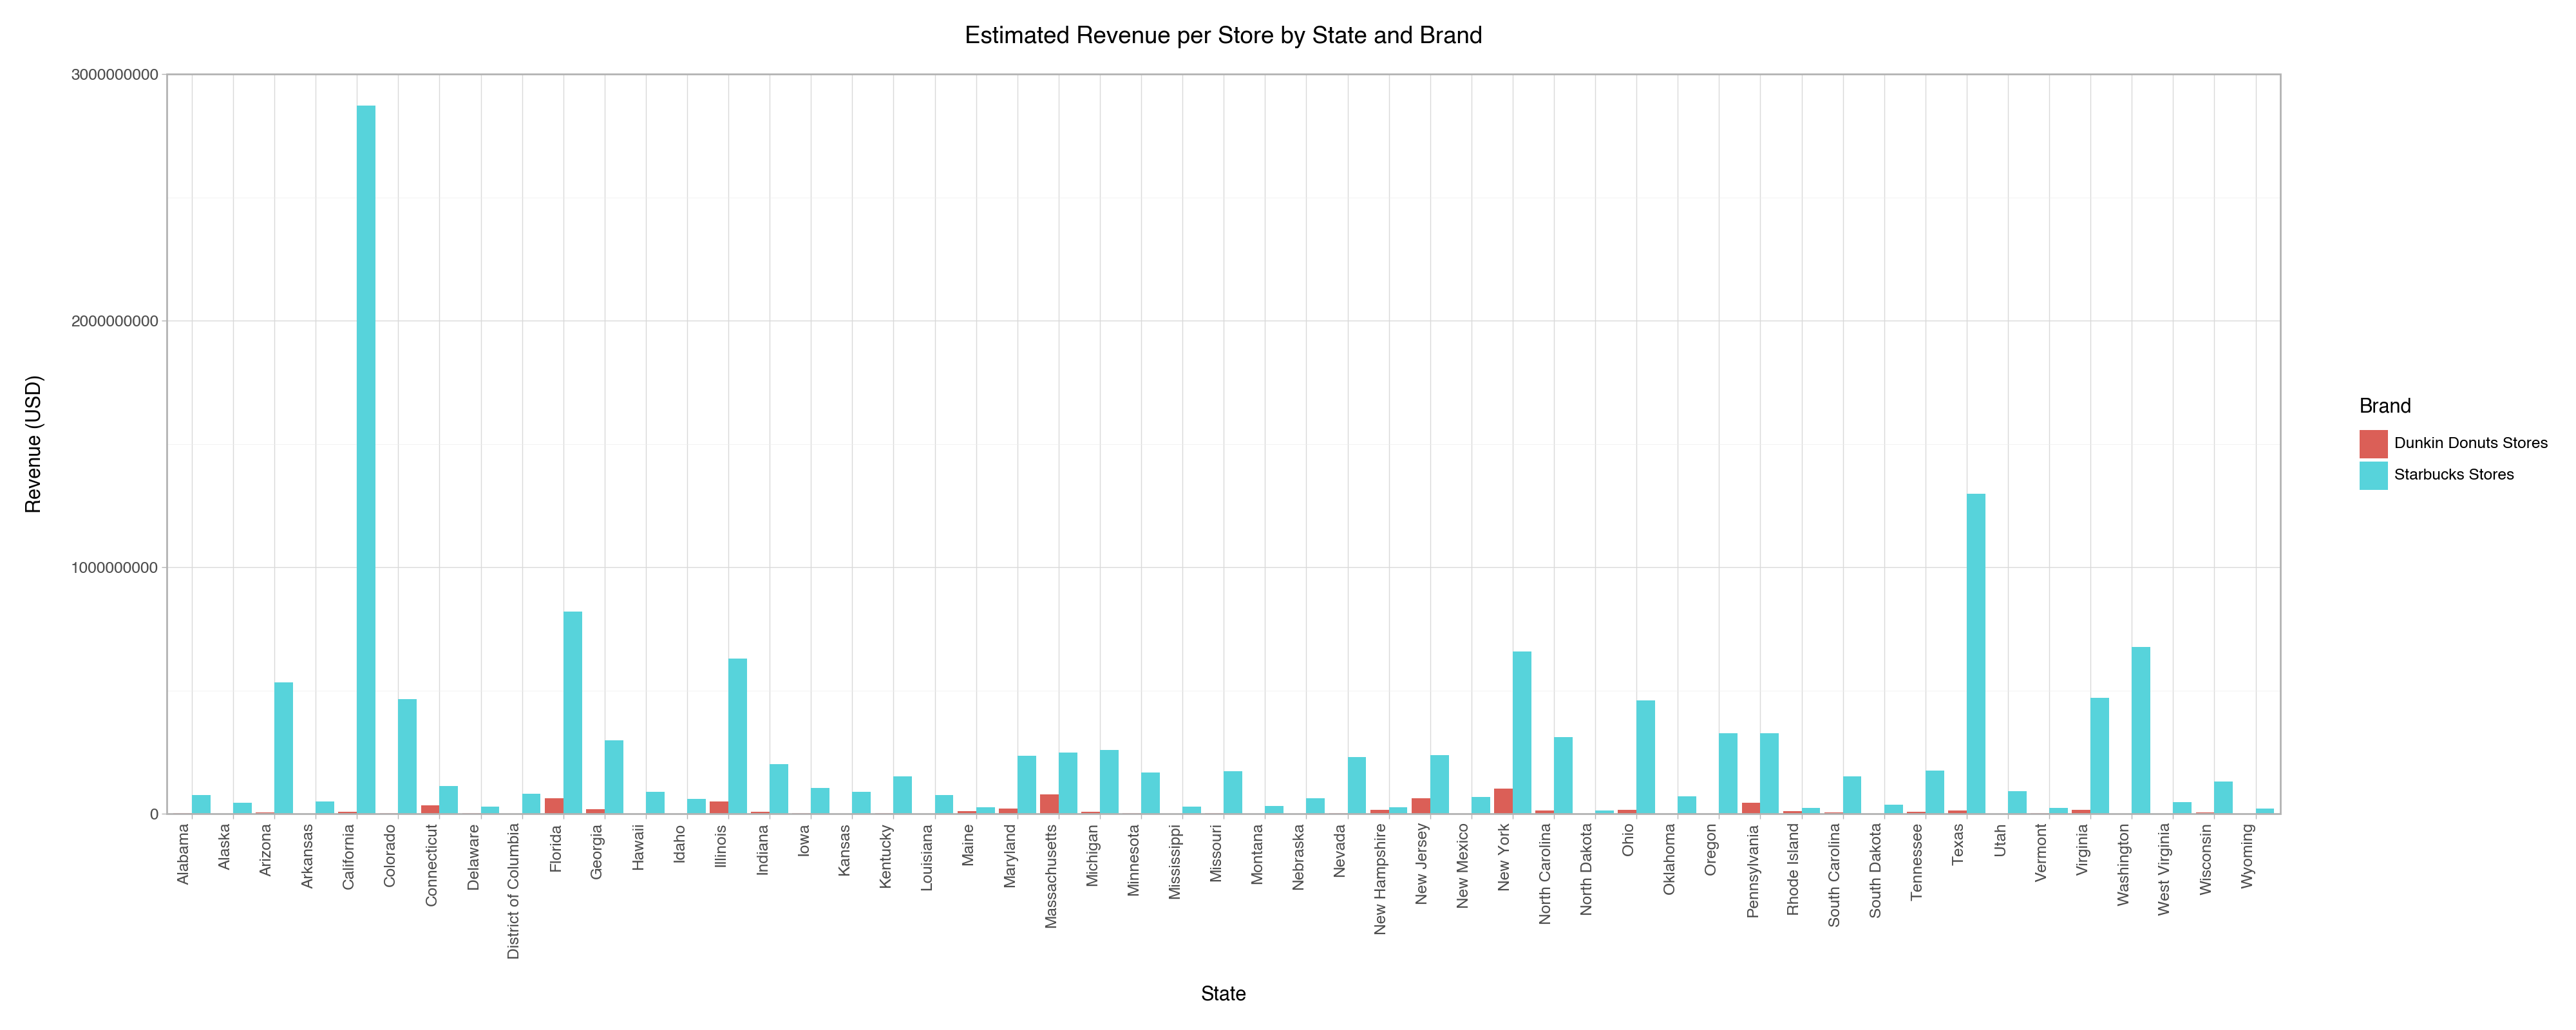

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 51 rows containing missing values.


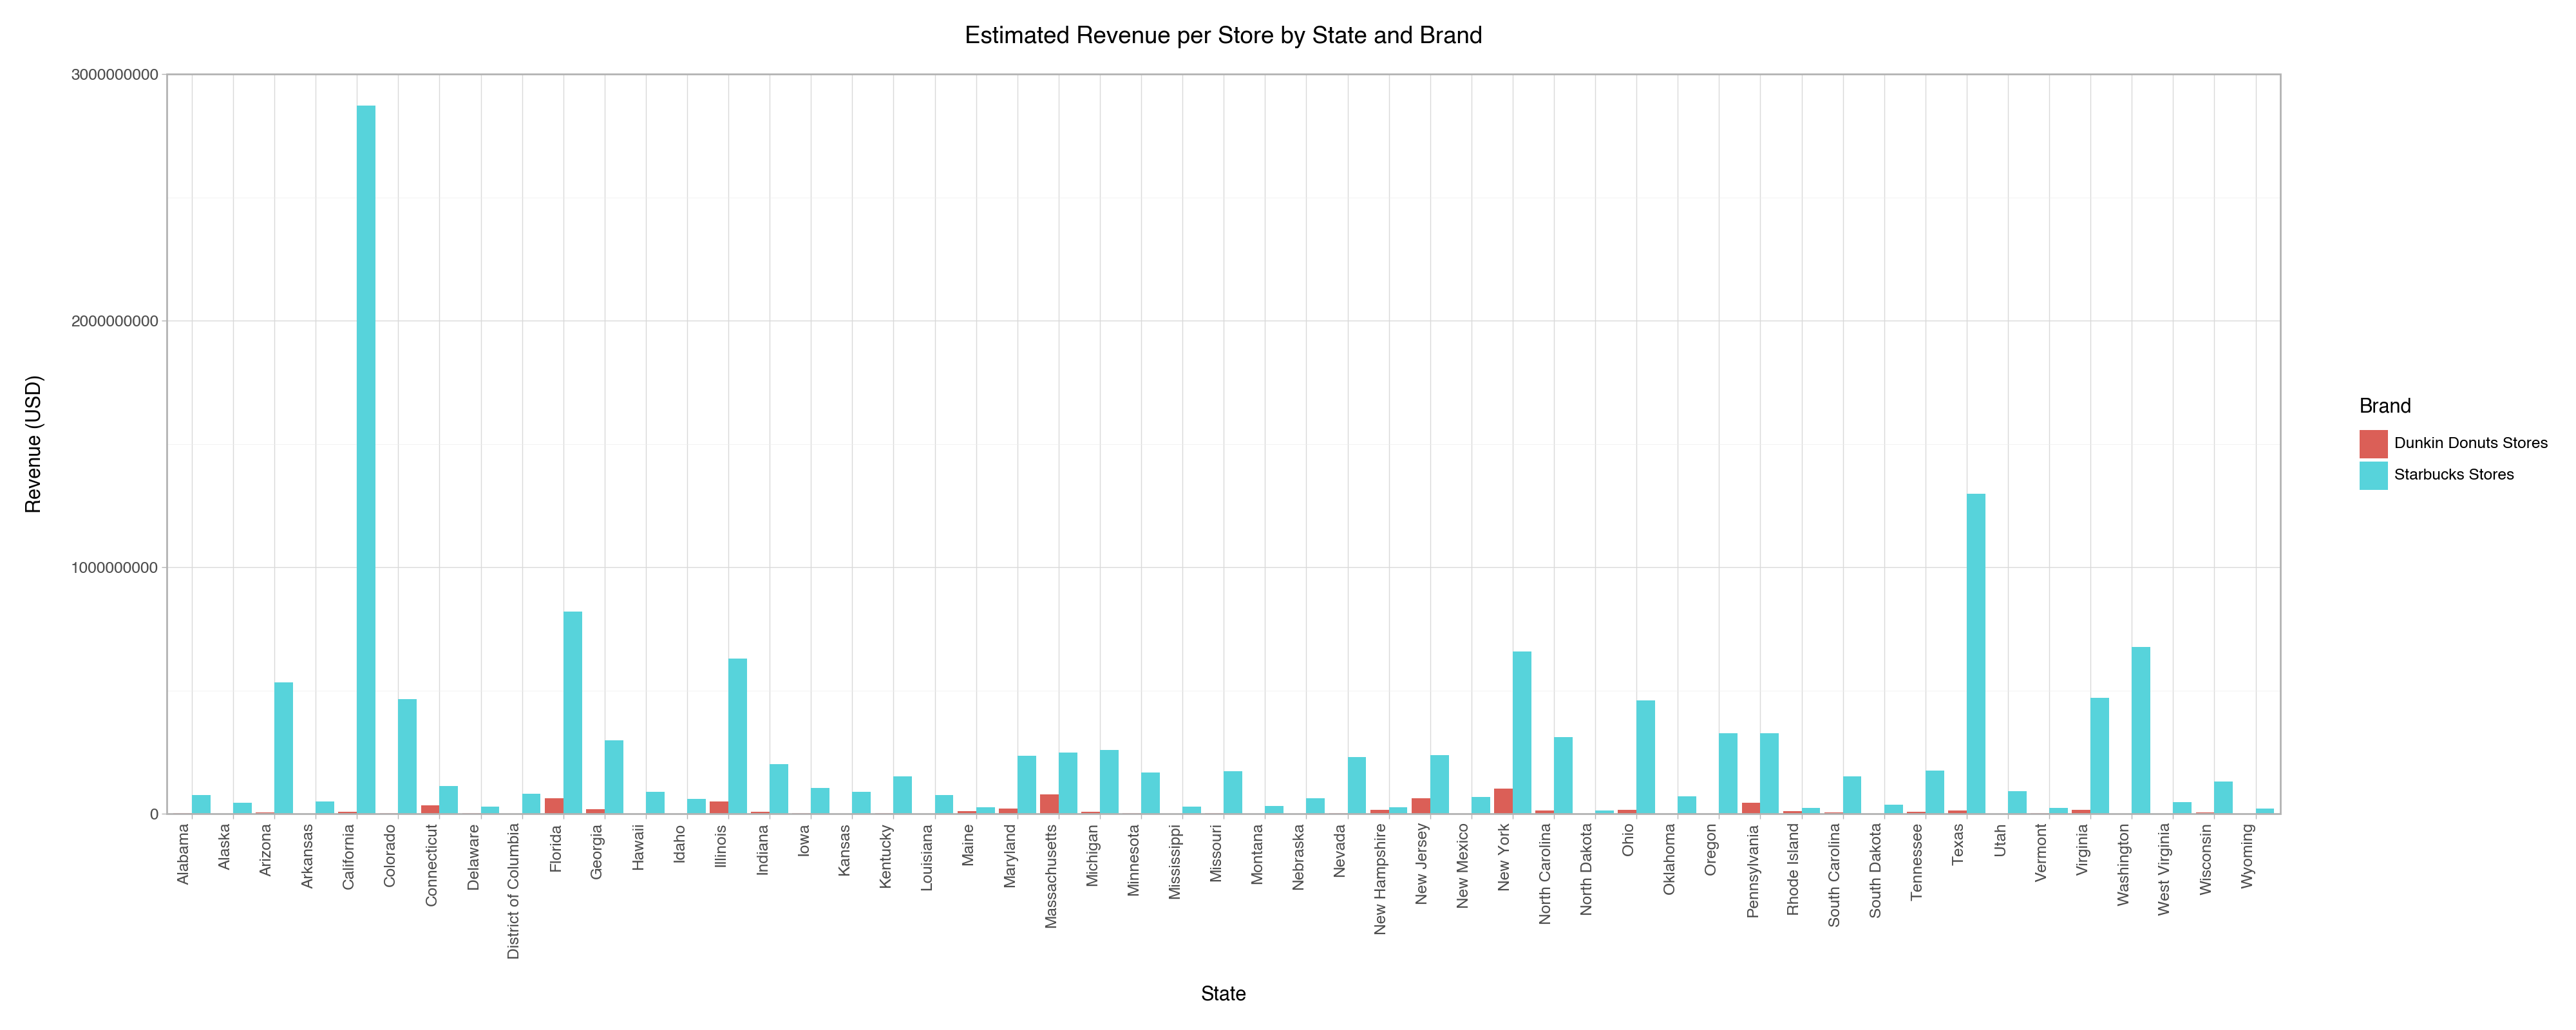

In [47]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, coord_flip

revenue_df = coffee_population_df.melt(
    id_vars=['State'],
    value_vars=['Estimated Starbucks Revenue', 'Estimated Dunkin Revenue'],
    var_name='Brand',
    value_name='Revenue'
)

revenue_df['Brand'] = revenue_df['Brand'].replace({
    'Estimated Starbucks Revenue': 'Starbucks Stores',
    'Estimated Dunkin Revenue': 'Dunkin Donuts Stores'
})

from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, scale_y_continuous, theme_light

plot = (
    ggplot(revenue_df, aes(x='State', y='Revenue', fill='Brand')) +
    geom_bar(stat='identity', position='dodge') +
    labs(
        title='Estimated Revenue per Store by State and Brand',
        x='State',
        y='Revenue (USD)'
    ) +
    theme_light() +
    scale_y_continuous(expand=[0, 0], limits=(0, 3e9)) +
    theme(
        axis_text_x=element_text(rotation=90, hjust=1),
        figure_size=(20, 8)
    )
)

plot


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 50 rows containing missing values.


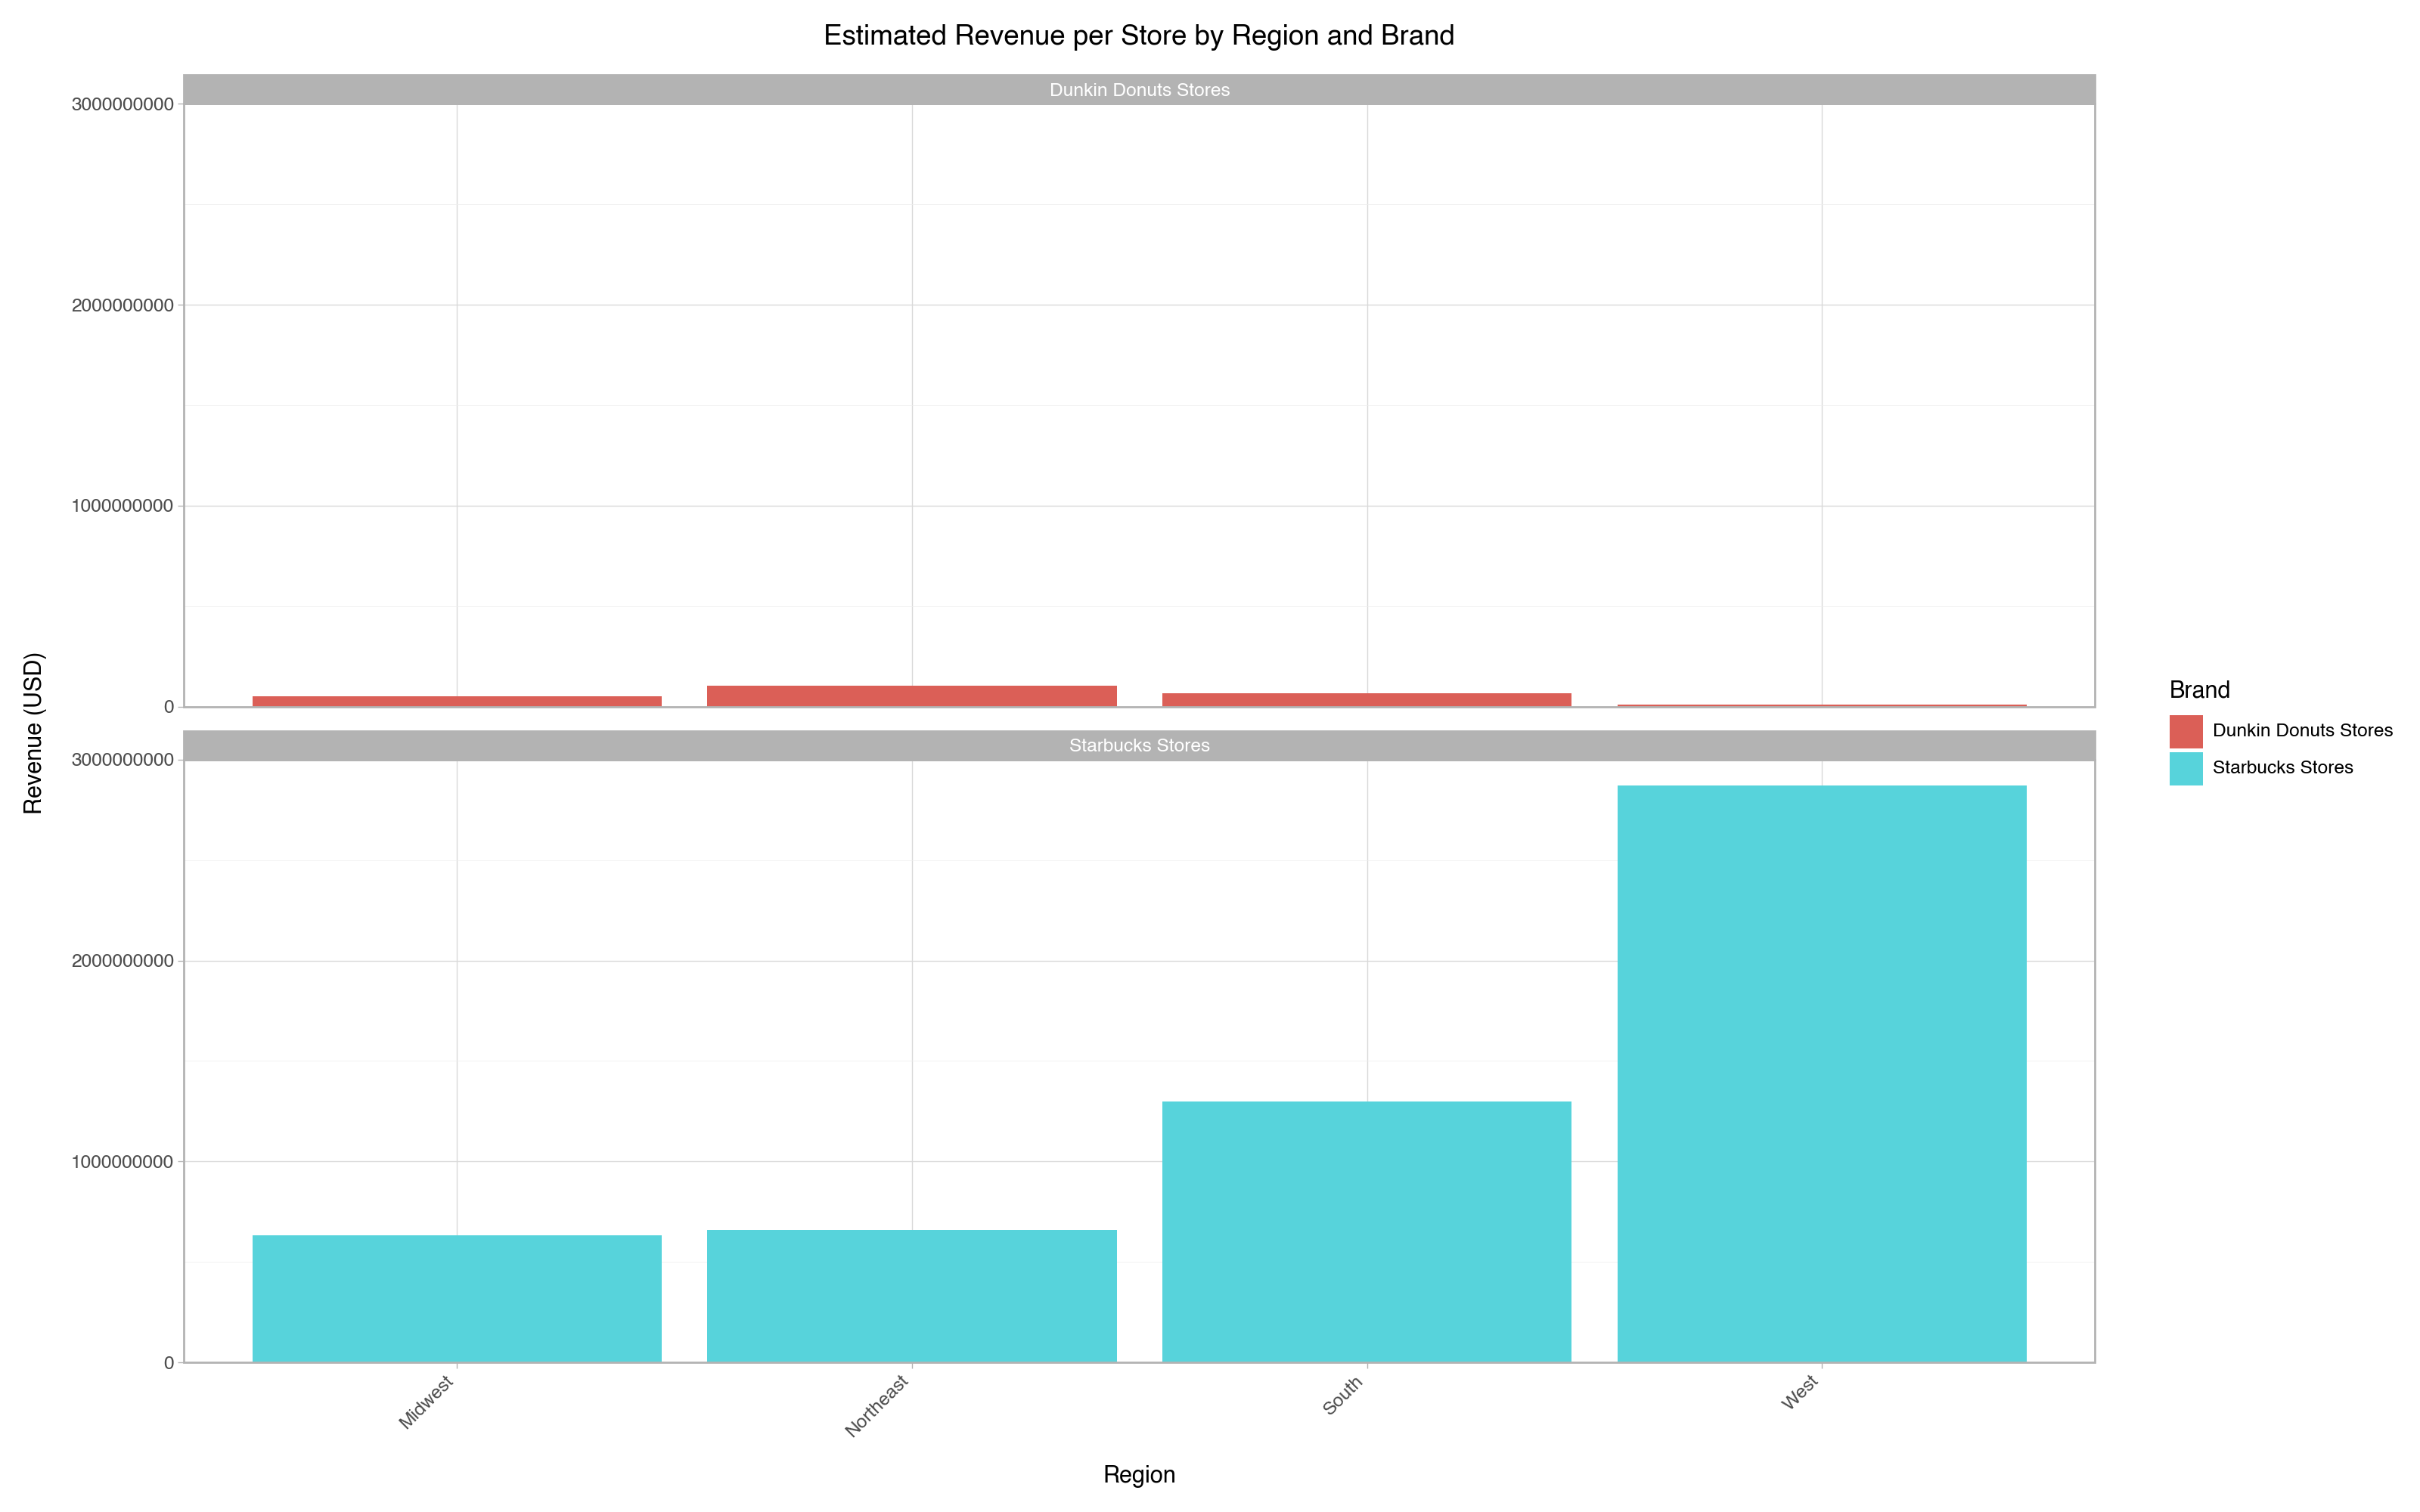

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 50 rows containing missing values.


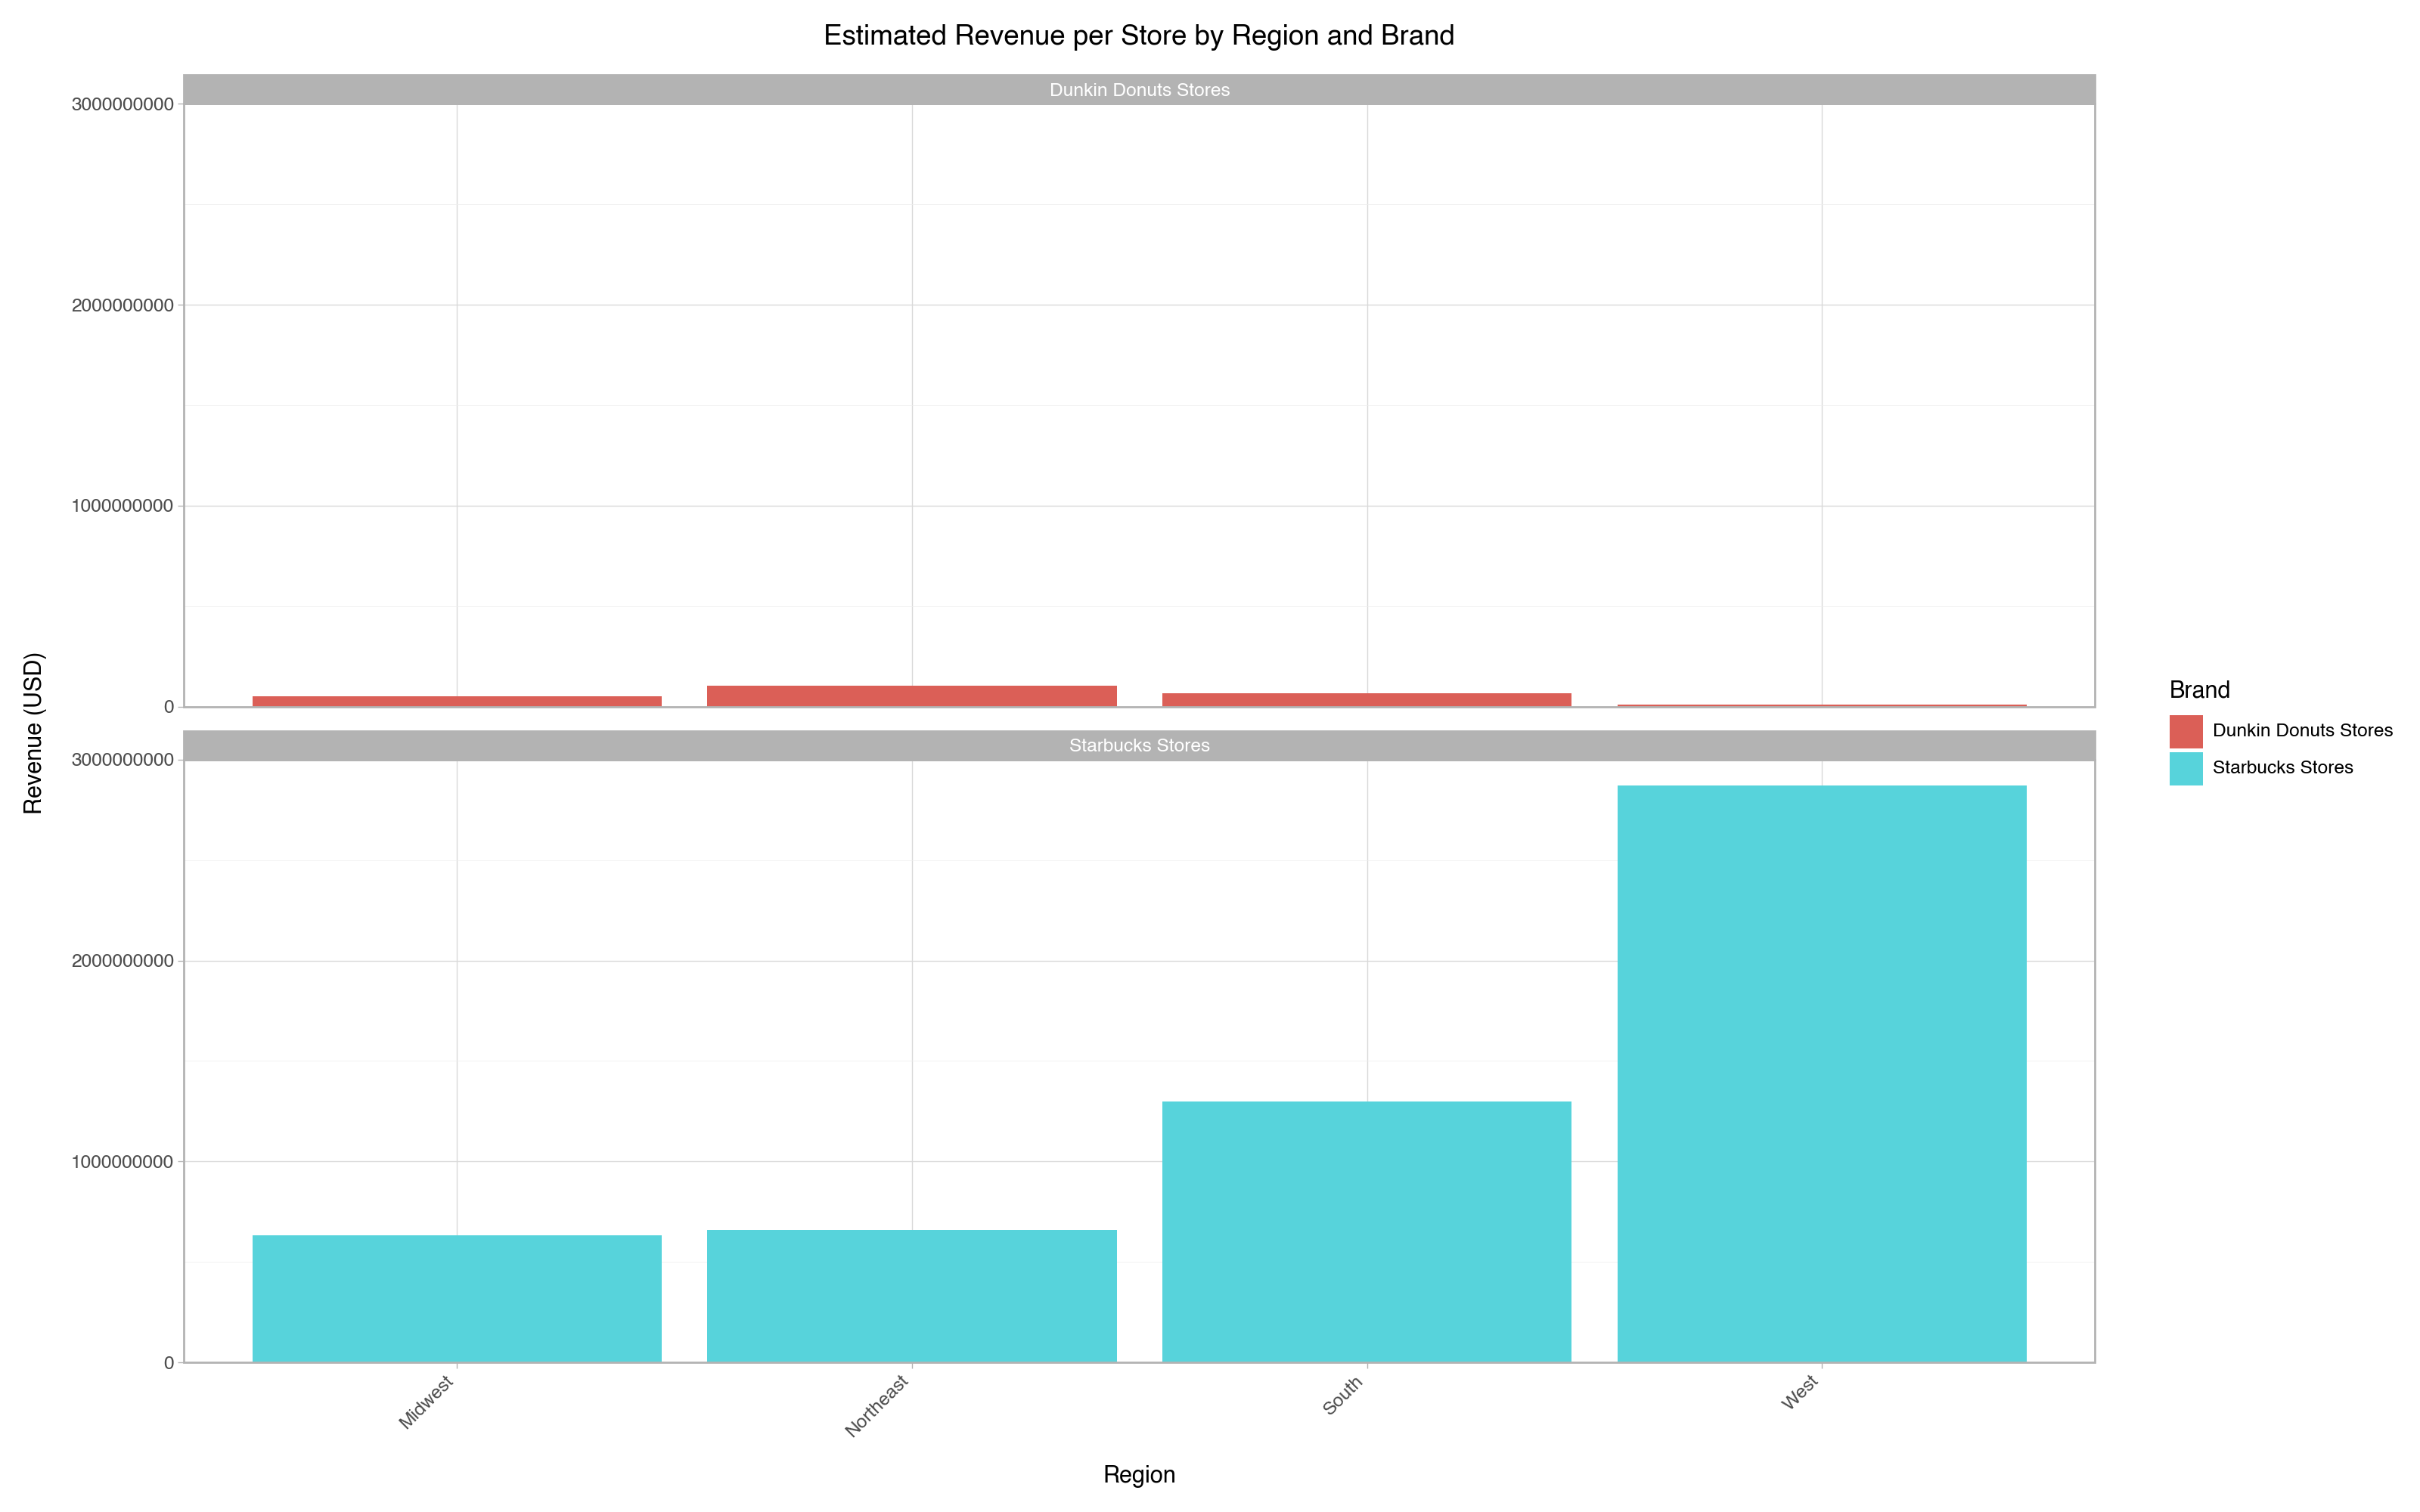

In [48]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, scale_y_continuous, theme_light, facet_wrap

region_mapping_flat = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'Washington, D.C': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South',
    'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
}

revenue_df['Region'] = revenue_df['State'].map(region_mapping_flat)

revenue_df_clean = revenue_df.dropna(subset=['Region'])

plot = (
    ggplot(revenue_df_clean, aes(x='Region', y='Revenue', fill='Brand')) +
    geom_bar(stat='identity', position='dodge') +
    labs(
        title='Estimated Revenue per Store by Region and Brand',
        x='Region',
        y='Revenue (USD)'
    ) +
    theme_light() +
    scale_y_continuous(expand=[0, 0], limits=(0, 3e9)) +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(16, 10)
    ) +
    facet_wrap('~Brand', ncol=1)
)

plot

The financial metric used in this analysis—estimated state-level revenue for Starbucks and Dunkin' Donuts—is based on each company’s total **yearly revenue divided by the number of stores in each state**, as individual state/store revenues are not publicly reported. The results show that **Starbucks dominates state-level revenue** across nearly all states, largely due to its significantly higher revenue, ranging from **$29 billion to $36 billion** between 2021, 2023, and 2024. In comparison, Dunkin' Donuts reported a far smaller **revenue of $1.4 billion to $1.25 billion** in 2023 and 2024, leading to Starbucks outperforming Dunkin' even in states where both brands are present.

Since the revenue estimates are proportional to the **number of stores per state**, states with a larger number of locations—such as **California, Texas, and Florida**—naturally show higher total revenues. However, Starbucks still generates more revenue even in states with fewer stores, like **Alaska**, reflecting its broader market presence and higher national revenue per store. Regional differences also play a role. Starbucks maintains a strong presence in **urban and coastal areas**—particularly in states like California, New York, and Washington—resulting in higher estimated revenues in those regions. In contrast, **Dunkin' Donuts’ strongest presence is in the Northeast**, with states like Massachusetts, New York, and New Jersey contributing most of its revenue. However, even in these regions, Starbucks’ total revenue outpaces Dunkin’s due to its **larger market share and financial scale**.

Given these dynamics, **adding five stores in California would be more profitable than adding five stores in Wyoming**. The higher population density, customer base, and spending patterns in California drive more sales per store, further amplifying the impact of Starbucks' brand strength and customer loyalty. Ultimately, Starbucks’ **dominant brand value and broader market reach** make it the clear leader in state-level revenue across the U.S. The company’s higher overall revenue and more extensive geographic presence give it an advantage, even when store counts between the two brands are similar in certain states. Dunkin' Donuts, while successful in select regions, cannot match Starbucks' financial impact at the national or state level due to **lower overall revenue and more limited geographic penetration**. This analysis highlights the significant gap between the two brands, with Starbucks consistently outperforming Dunkin’ in terms of revenue, regardless of the number of stores in a particular state.

* Does the distribution of each chain’s stores match population distribution, by both state/region?



/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 50 rows containing missing values.


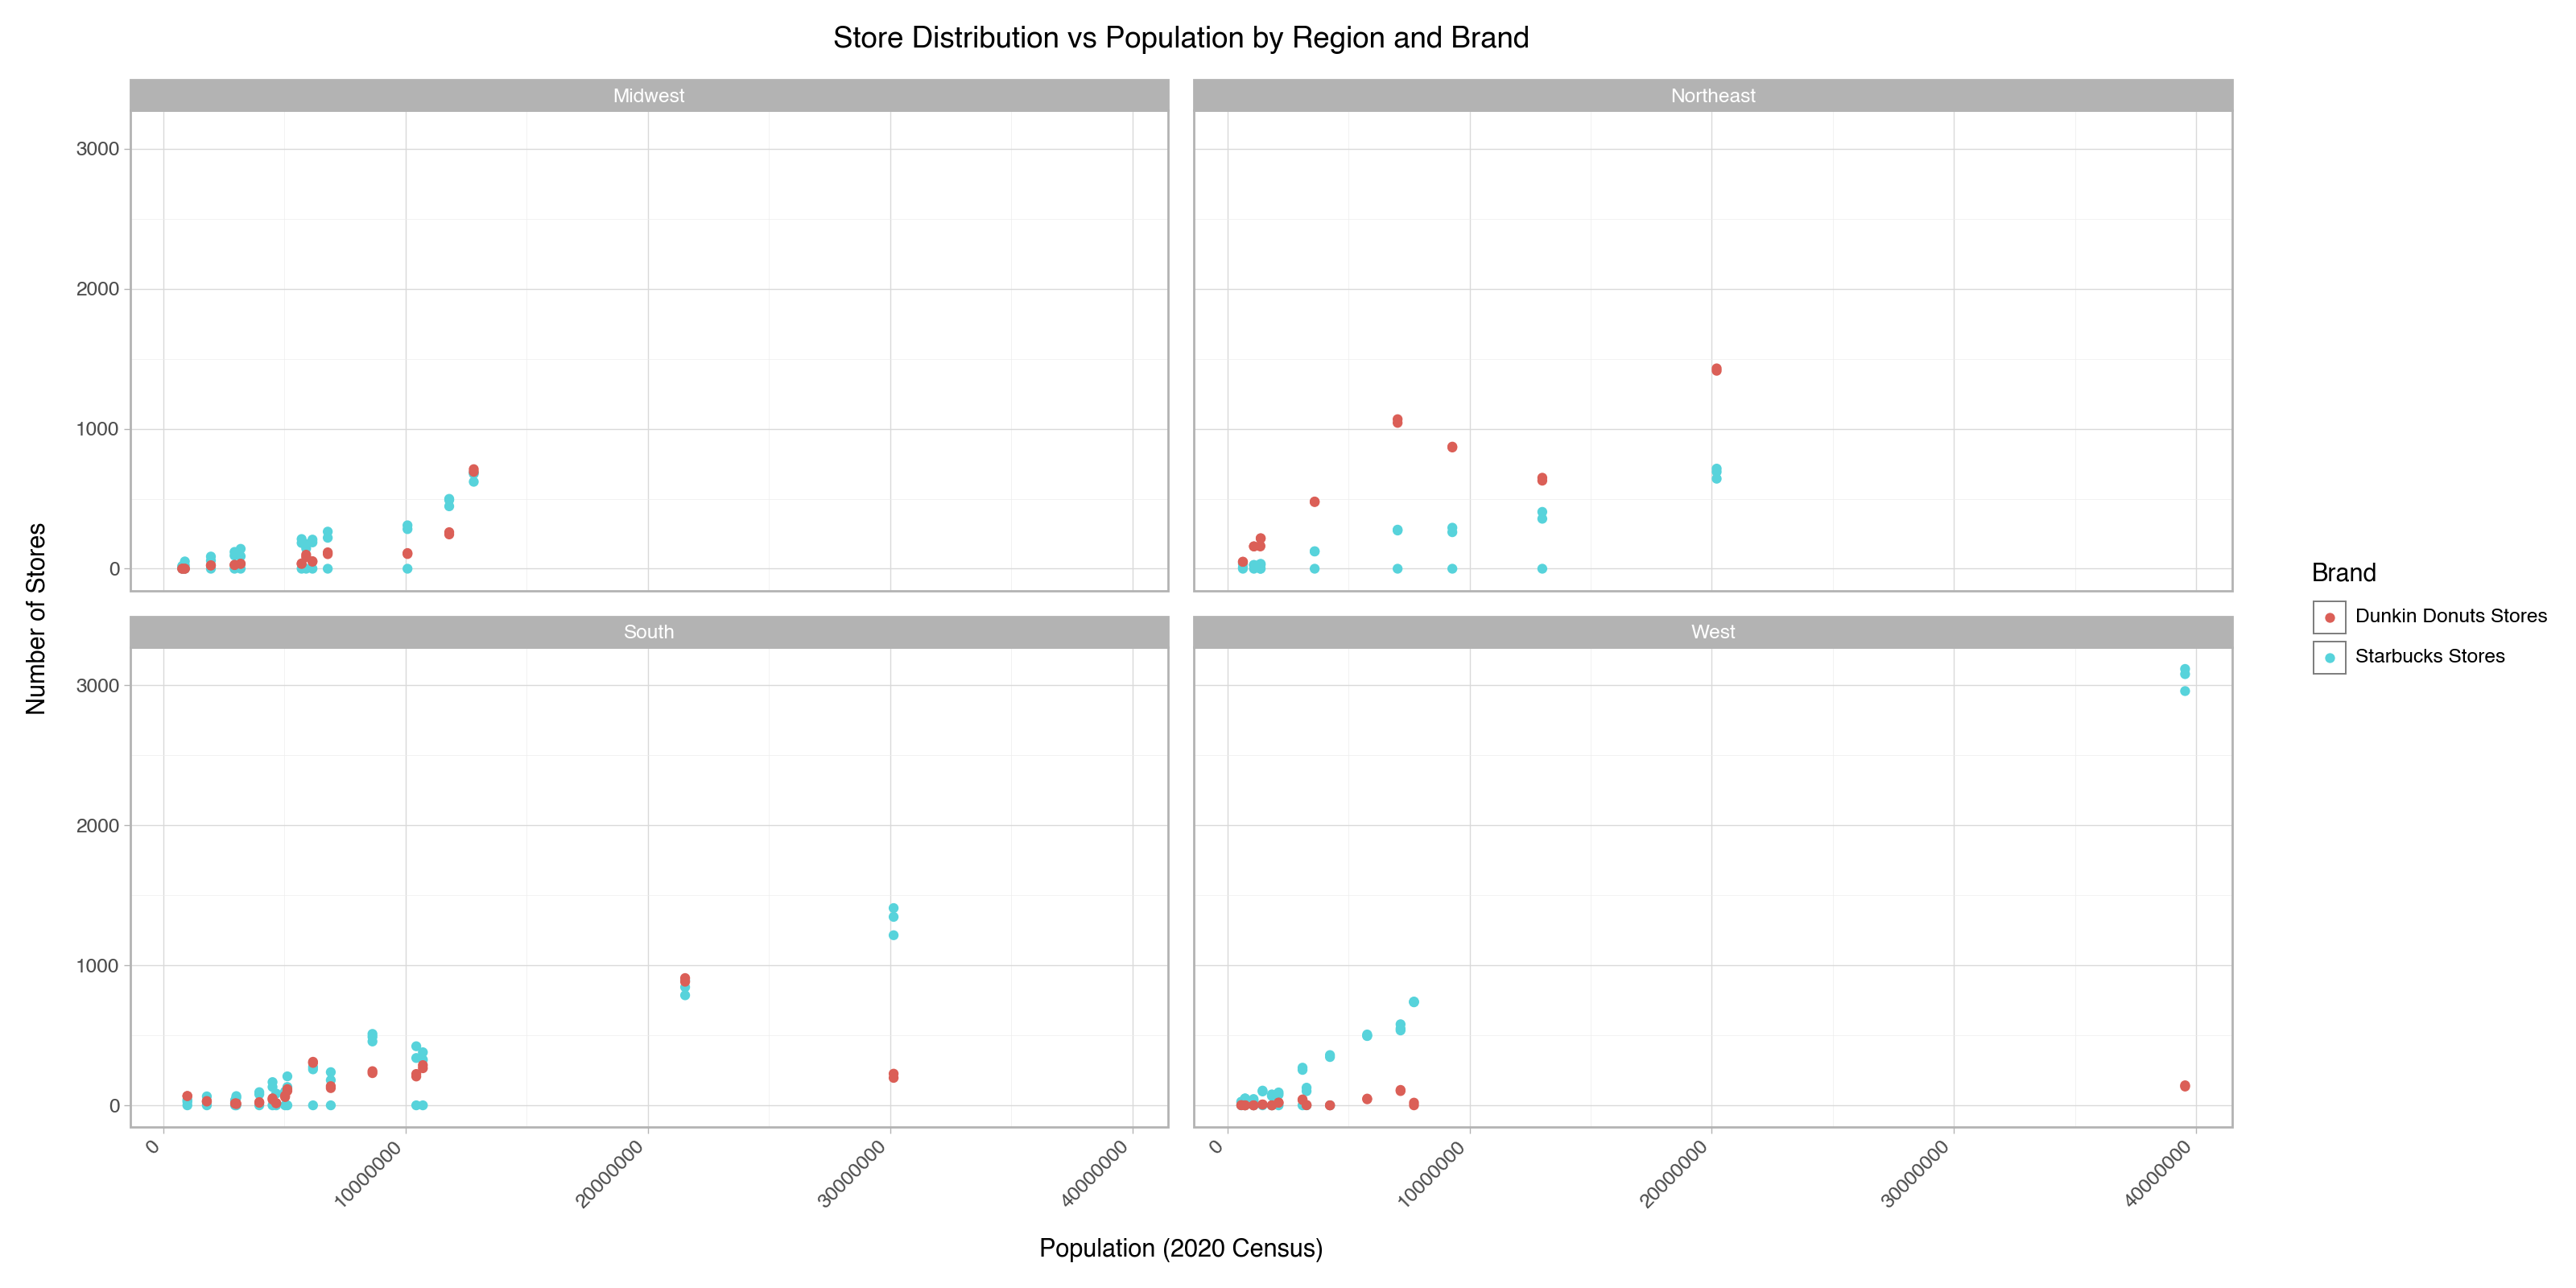

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 50 rows containing missing values.


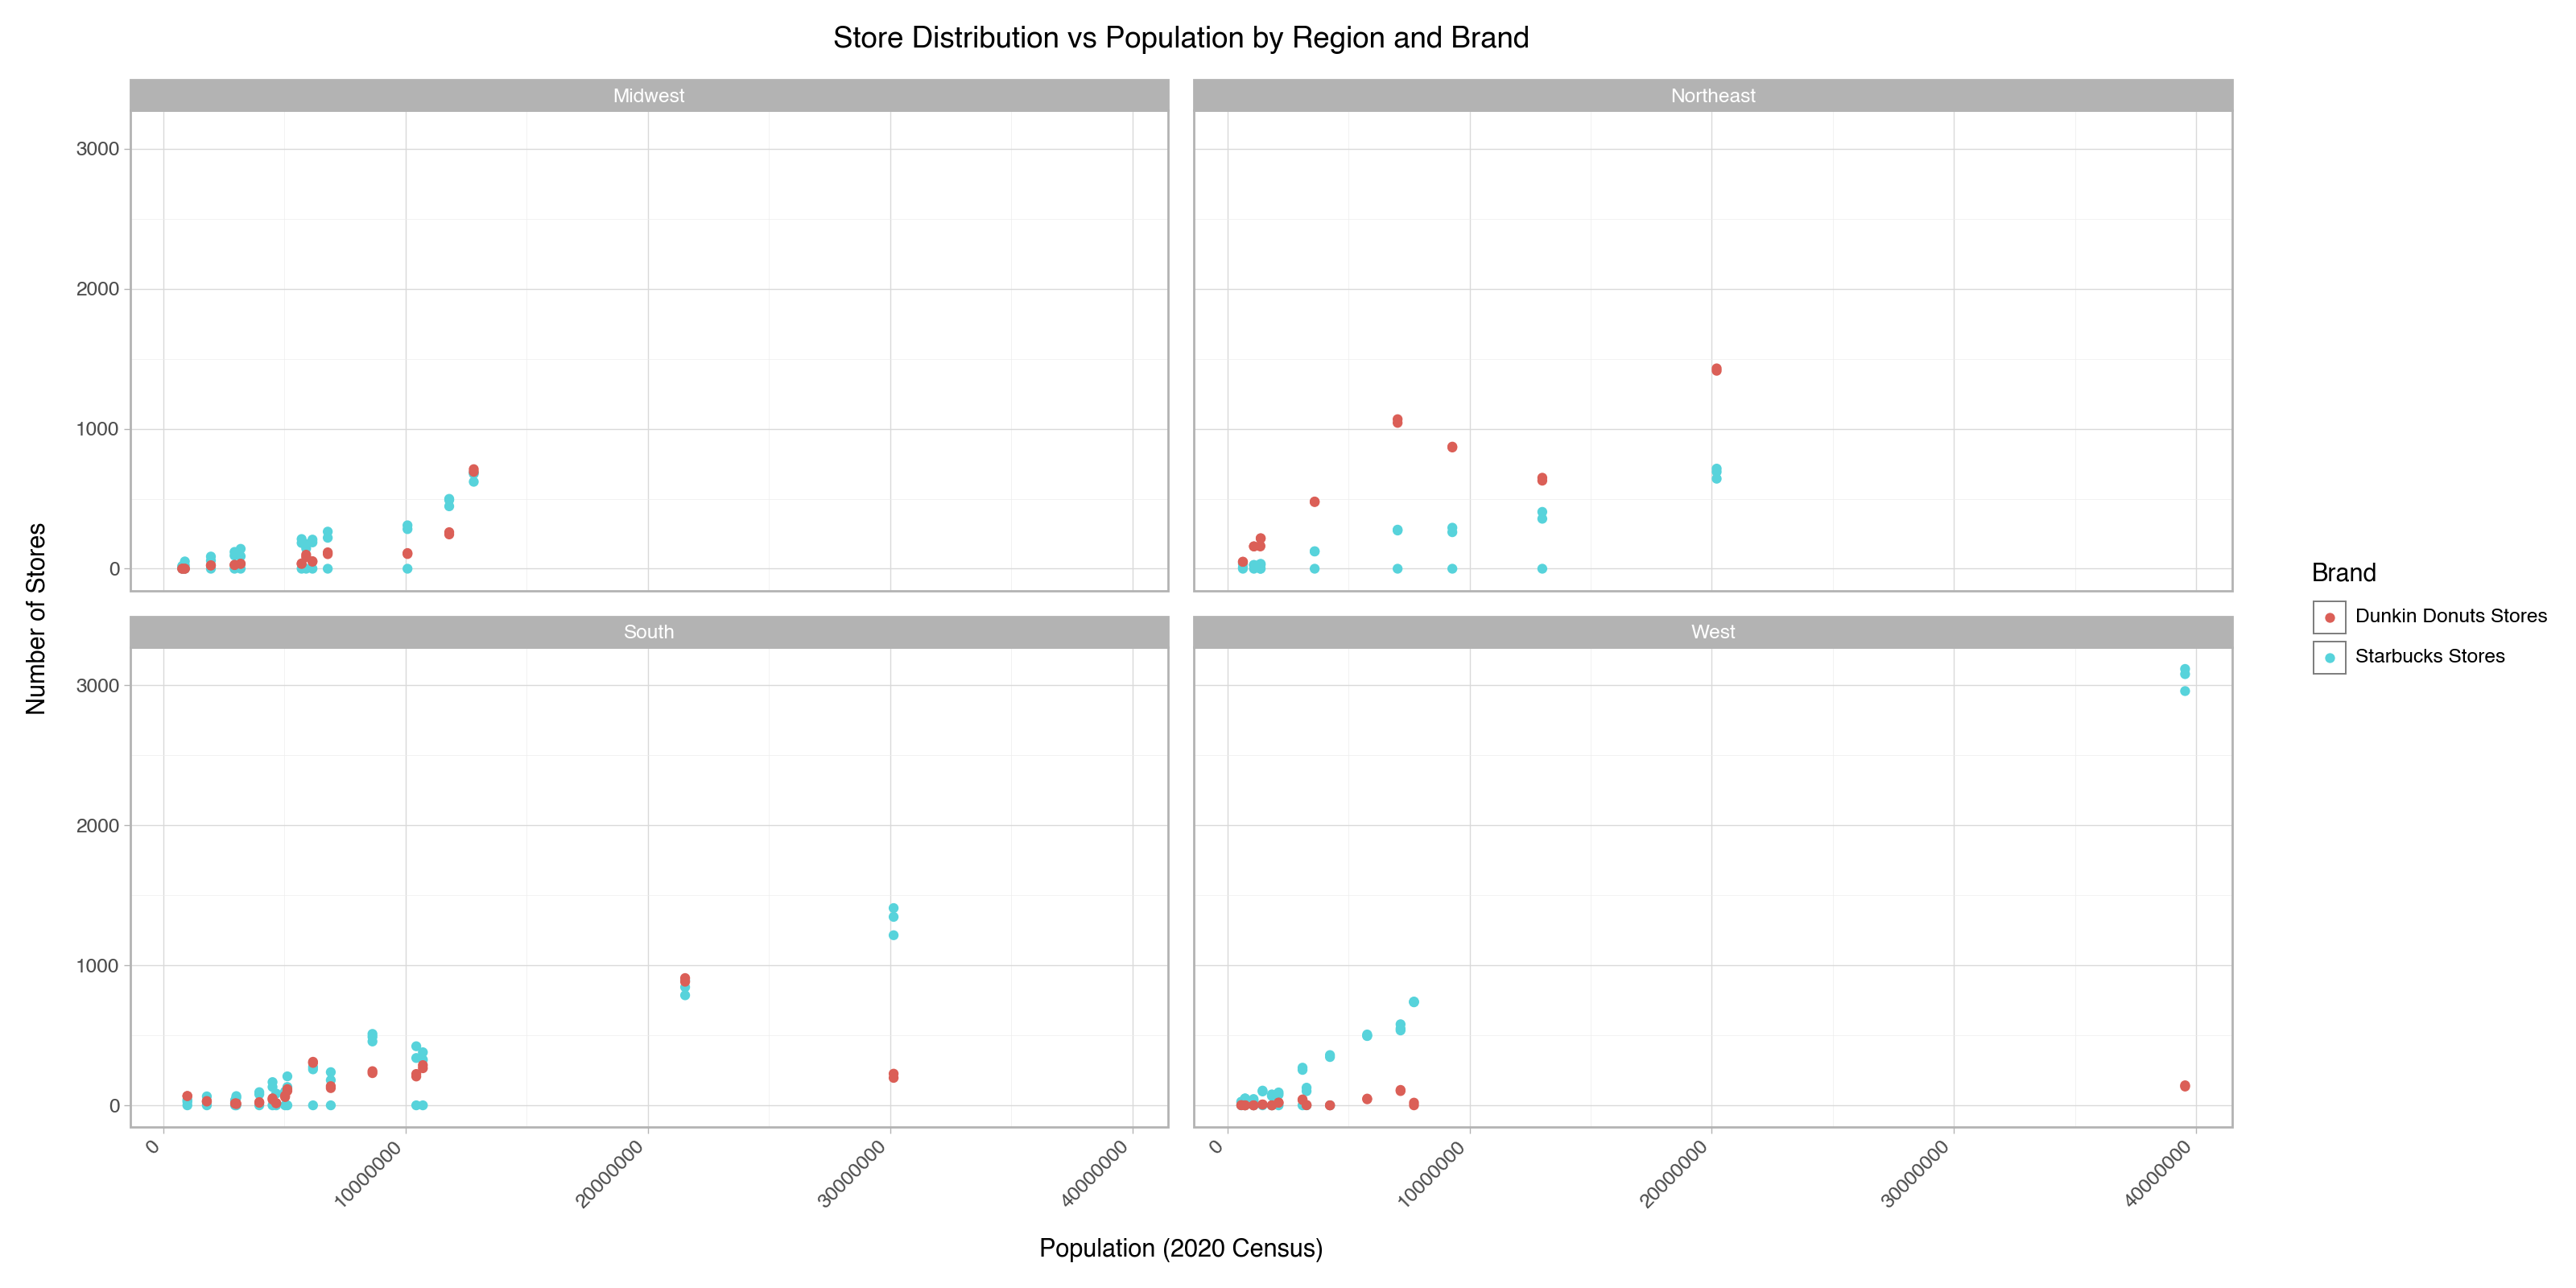

In [49]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_light, facet_wrap, theme, element_text


# Map states to regions
region_mapping_flat = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'Washington, D.C': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South',
    'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
}

coffee_population_df['Region'] = coffee_population_df['State'].map(region_mapping_flat)

store_population_df_clean = coffee_population_df.dropna(subset=['Region'])

store_population_df = store_population_df_clean.melt(
    id_vars=['State', 'Region', 'Population 2020'],
    value_vars=['Starbucks Stores', 'Dunkin Donuts Stores'],
    var_name='Brand',
    value_name='Store_Count'
)

plot = (
    ggplot(store_population_df, aes(x='Population 2020', y='Store_Count', color='Brand')) +
    geom_point() +
    facet_wrap('~Region') +
    labs(
        title="Store Distribution vs Population by Region and Brand",
        x="Population (2020 Census)",
        y="Number of Stores"
    ) +
    theme_light() +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(16, 8)
    )
)

plot


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 50 rows containing missing values.


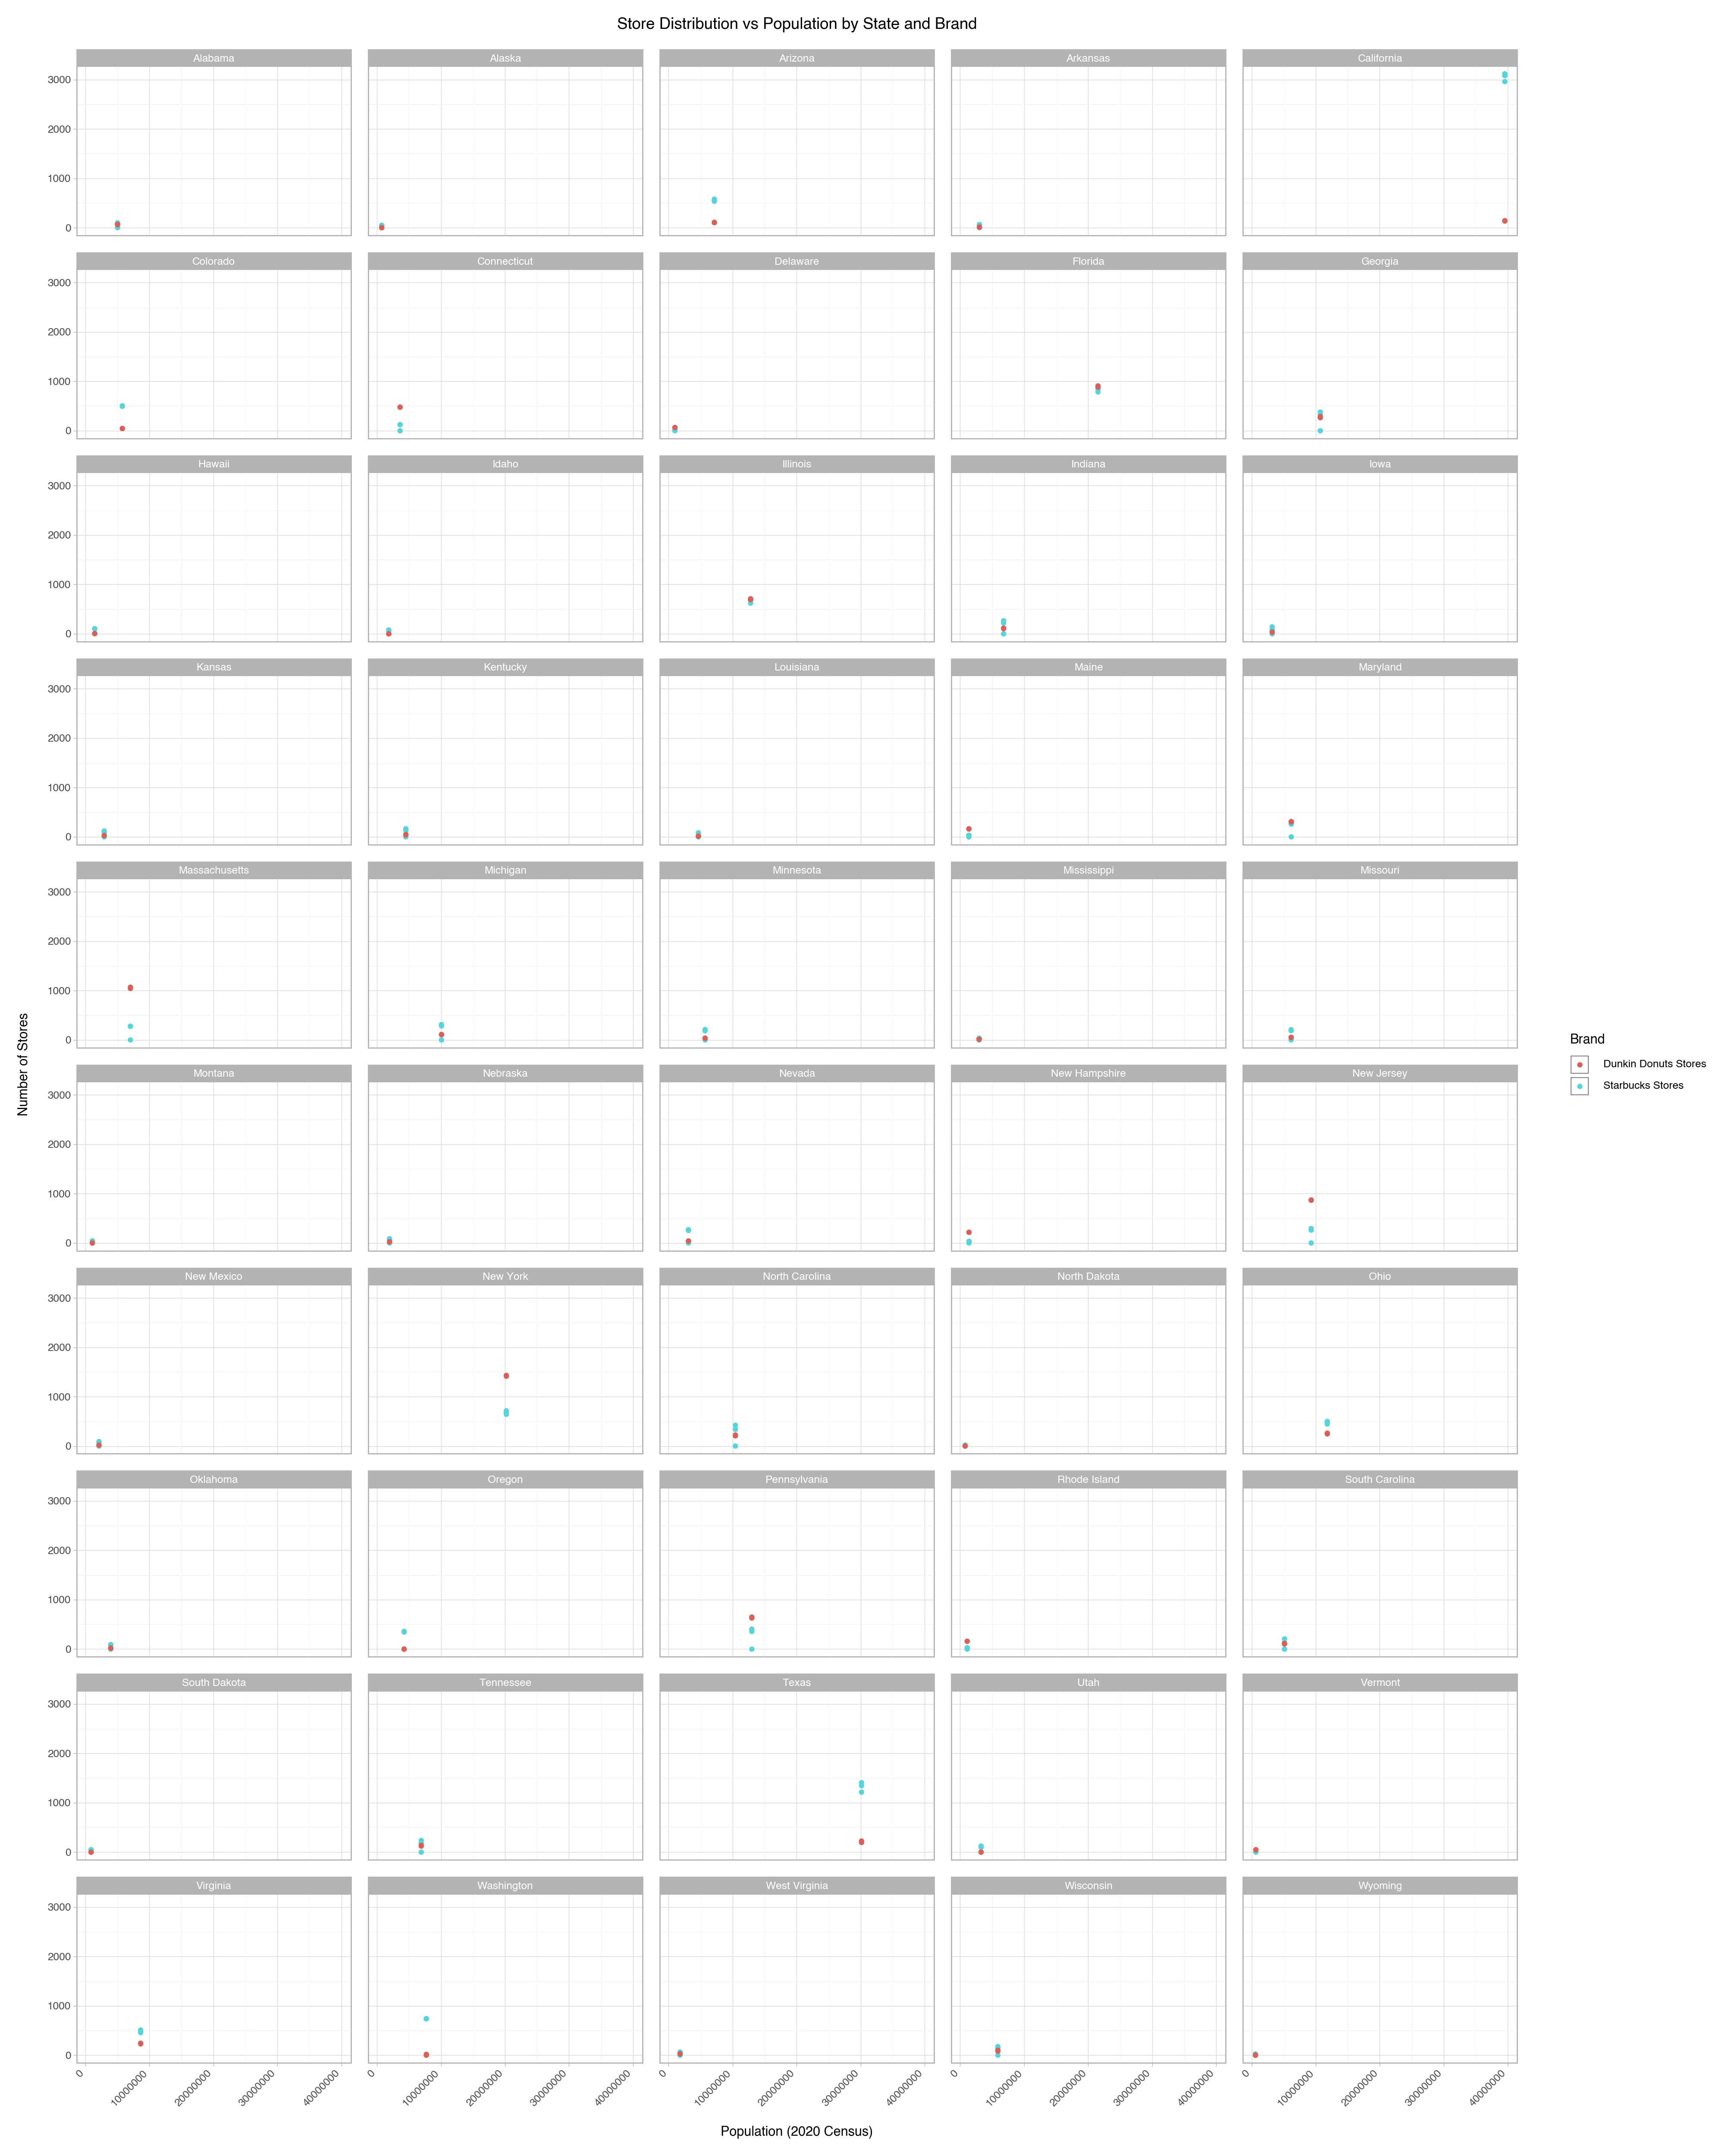

In [51]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_light, facet_wrap, theme, element_text


region_mapping_flat = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'Washington, D.C': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South',
    'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
}

coffee_population_df['Region'] = coffee_population_df['State'].map(region_mapping_flat)

store_population_df_clean = coffee_population_df.dropna(subset=['Region'])

store_population_df = store_population_df_clean.melt(
    id_vars=['State', 'Region', 'Population 2020'],
    value_vars=['Starbucks Stores', 'Dunkin Donuts Stores'],
    var_name='Brand',
    value_name='Store_Count'
)

plot = (
    ggplot(store_population_df, aes(x='Population 2020', y='Store_Count', color='Brand')) +
    geom_point() +
    facet_wrap('~State', ncol=5) +
    labs(
        title="Store Distribution vs Population by State and Brand",
        x="Population (2020 Census)",
        y="Number of Stores"
    ) +
    theme_light() +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(20, 25)
    )
)



The distribution of Starbucks stores aligns closely with population across regions, showing a **positive correlation** where states with larger populations tend to have more stores. **While there is a positive relationship between population size and the number of stores in all regions**, Starbucks shows **greater consistency in expanding its stores** across states with varying population sizes. This suggests that Starbucks follows a **broader market penetration strategy**, reaching even less populated areas. In contrast, **Dunkin' Donuts’ distribution is more concentrated** in specific regions, particularly the **Northeast**, where it has established brand loyalty. Dunkin' has a smaller presence in the West and South, focusing more heavily on **core markets** rather than national distribution. Starbucks, with a more **diverse geographic strategy**, maintains higher store counts across a wider range of regions and population sizes.

* Do the financial data match what you’d expect based on the number and locations of the stores? Why or why not?



/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 50 rows containing non-finite values.


/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


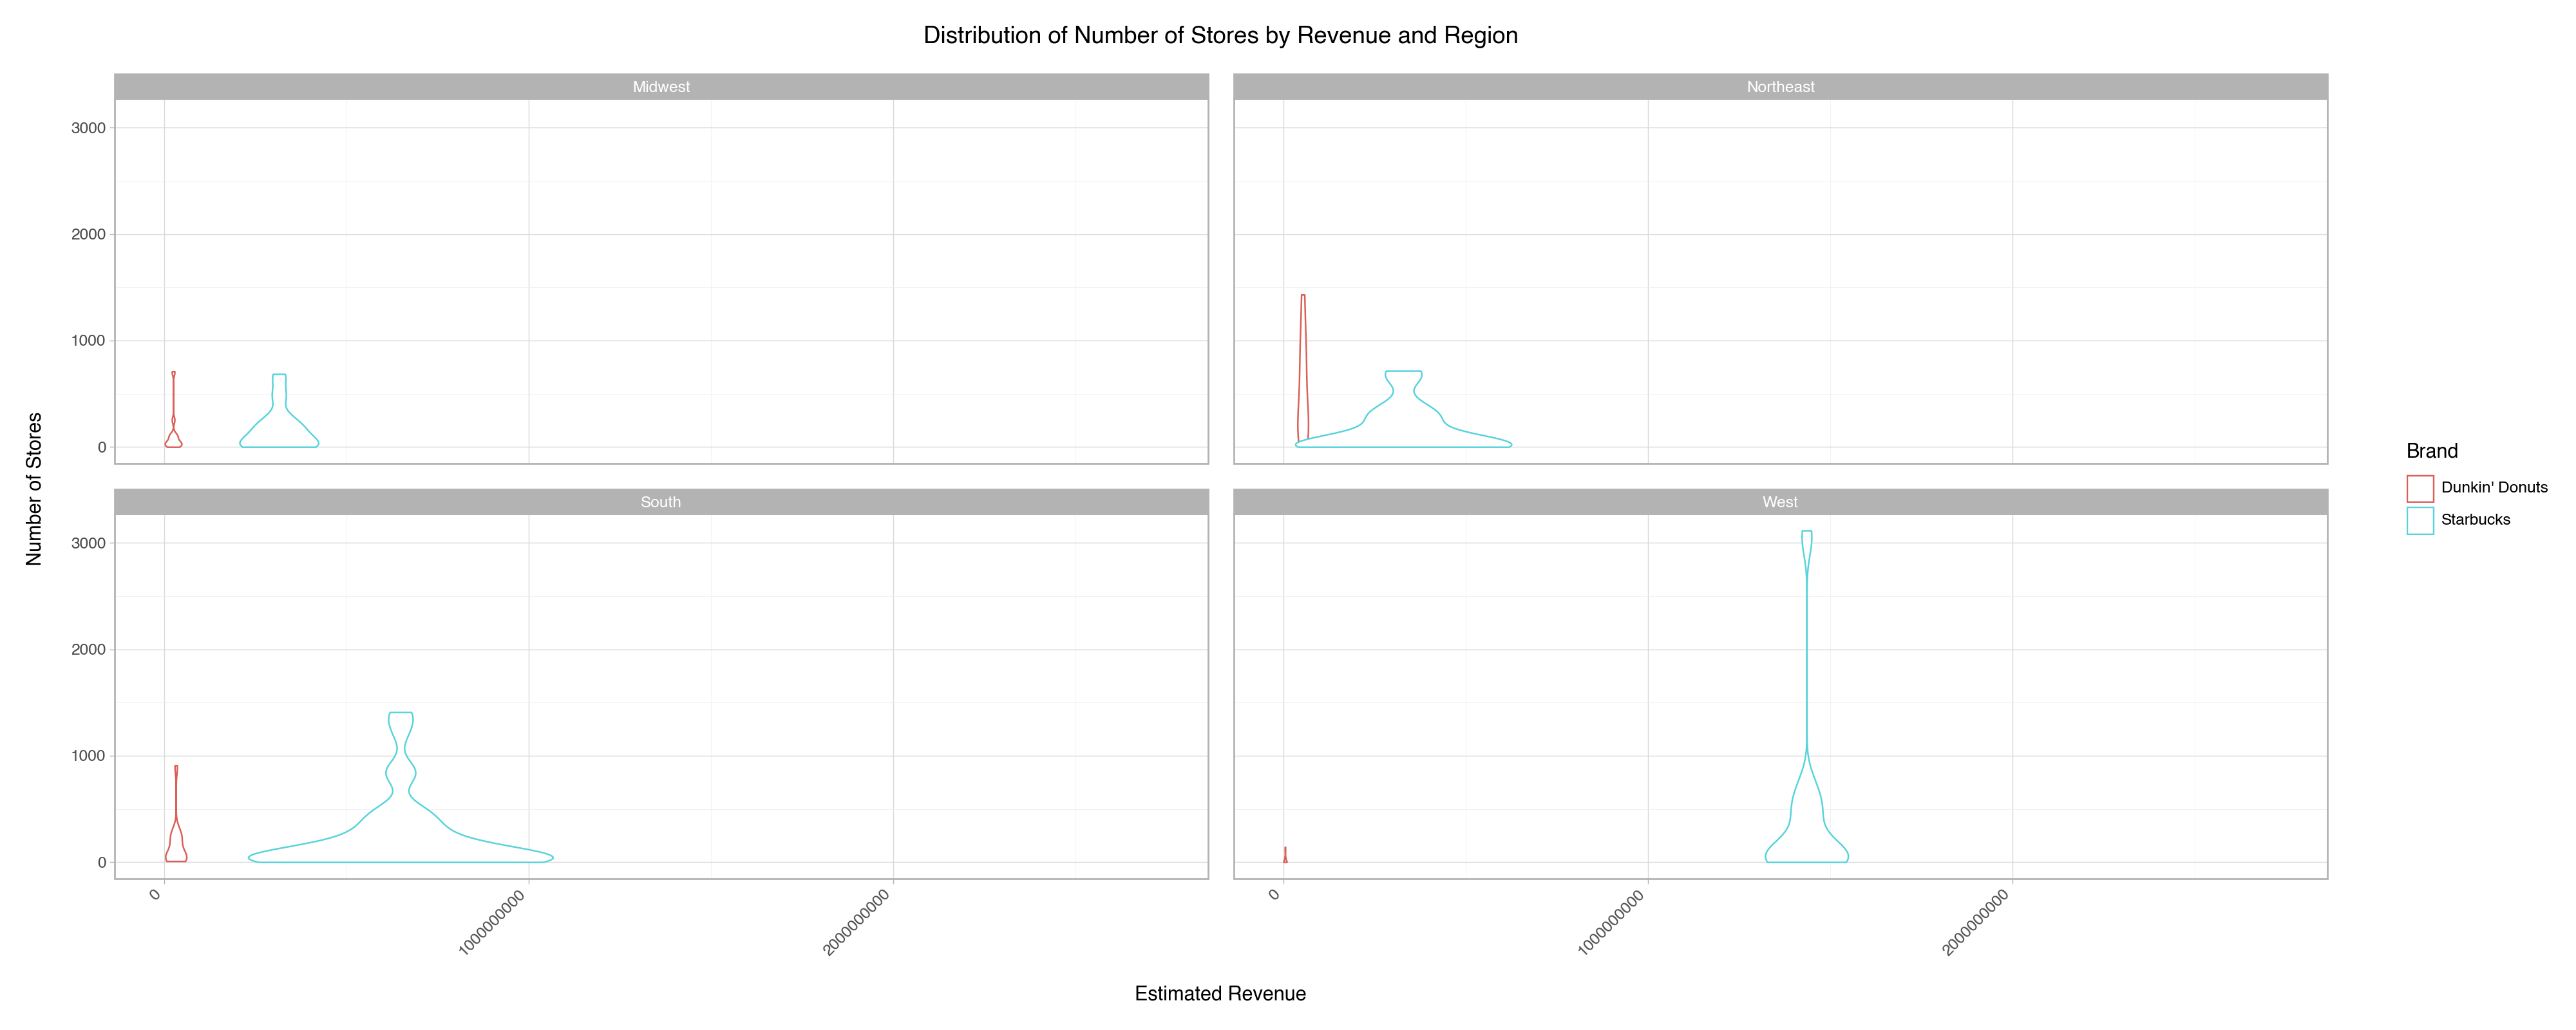

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 50 rows containing non-finite values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


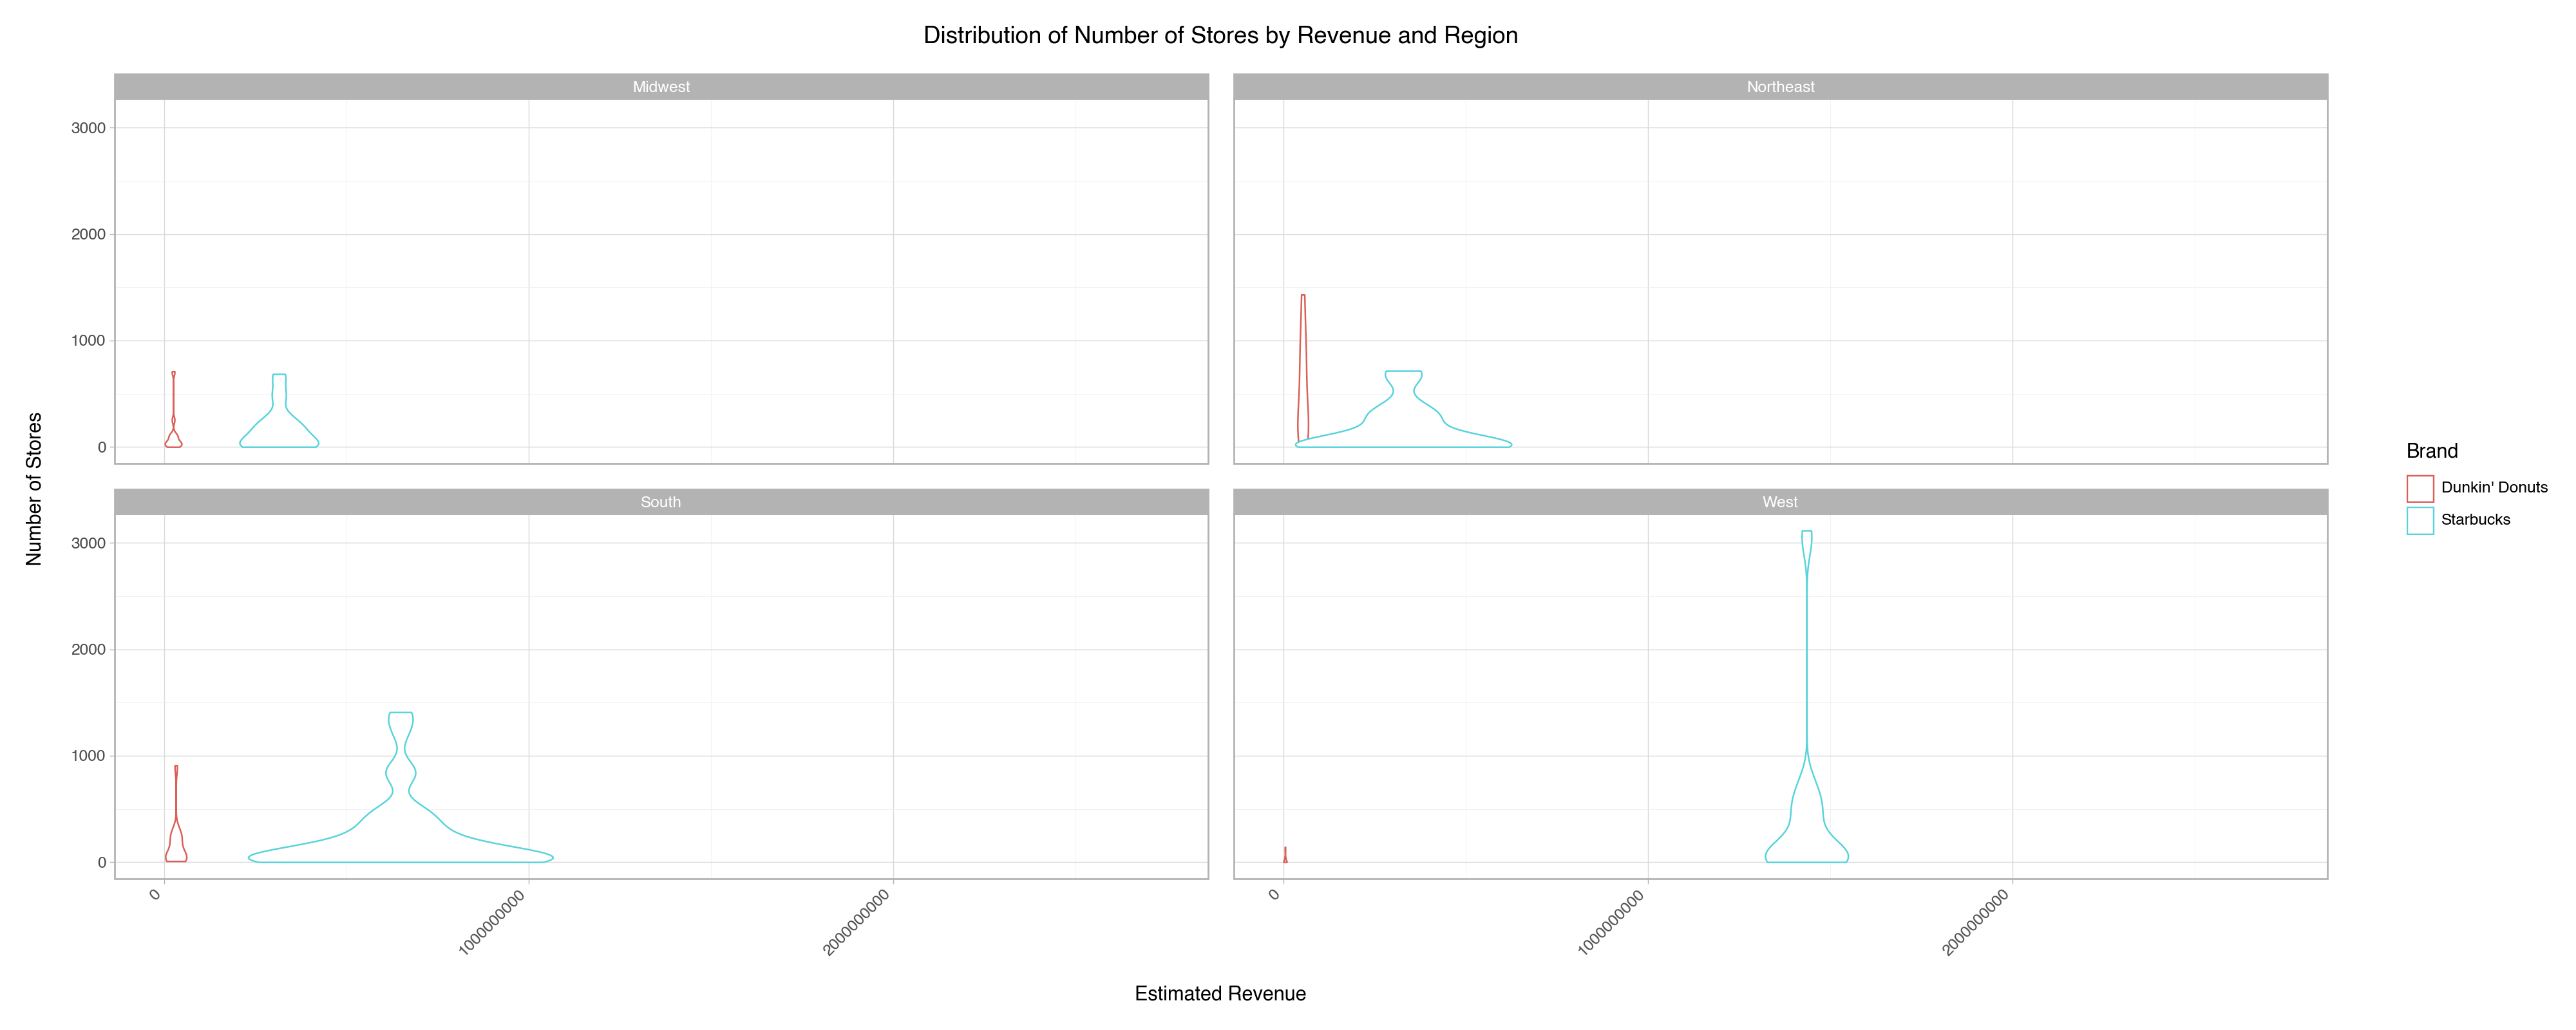

In [52]:
import pandas as pd
from plotnine import ggplot, aes, geom_violin, labs, theme_light, theme, facet_wrap, element_text



coffee_population_df['Starbucks_Revenue'] = coffee_population_df['Estimated Starbucks Revenue']
coffee_population_df['Dunkin_Revenue'] = coffee_population_df['Estimated Dunkin Revenue']

final_df = coffee_population_df.melt(
    id_vars=['State', 'Region', 'Starbucks_Revenue', 'Dunkin_Revenue'],
    value_vars=['Starbucks Stores', 'Dunkin Donuts Stores'],
    var_name='Brand',
    value_name='num_stores'
)

final_df['revenue'] = final_df.apply(
    lambda row: row['Starbucks_Revenue'] if row['Brand'] == 'Starbucks Stores' else row['Dunkin_Revenue'], axis=1
)

final_df['Brand'] = final_df['Brand'].replace({
    'Starbucks Stores': 'Starbucks',
    'Dunkin Donuts Stores': 'Dunkin\' Donuts'
})

final_df_clean = final_df.dropna(subset=['Region'])

plot = (
    ggplot(final_df_clean, aes(x='revenue', y='num_stores', color='Brand')) +
    geom_violin() +
    facet_wrap('~Region') +
    labs(
        x="Estimated Revenue",
        y="Number of Stores",
        title="Distribution of Number of Stores by Revenue and Region"
    ) +
    theme_light() +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(20, 8)
    )
)

plot



The financial data aligns with my expectations, showing that Starbucks generates higher revenue due to its **broad geographic presence** across multiple regions. Starbucks performs well not only in dense regions like the **South and West** but also in more distributed areas, reflecting a **scalable business model**. In contrast, Dunkin’ Donuts focuses primarily on the **Northeast**, limiting its national revenue potential. The density plots highlight that Dunkin's **regional concentration** results in fewer stores and lower revenue outside its core markets. Overall, the financial performance of both companies reflects their distinct business strategies—**Starbucks with national expansion** and **Dunkin' with regional dominance**.

## Automate

### Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should



* Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

* Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

* Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 50 rows containing non-finite values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


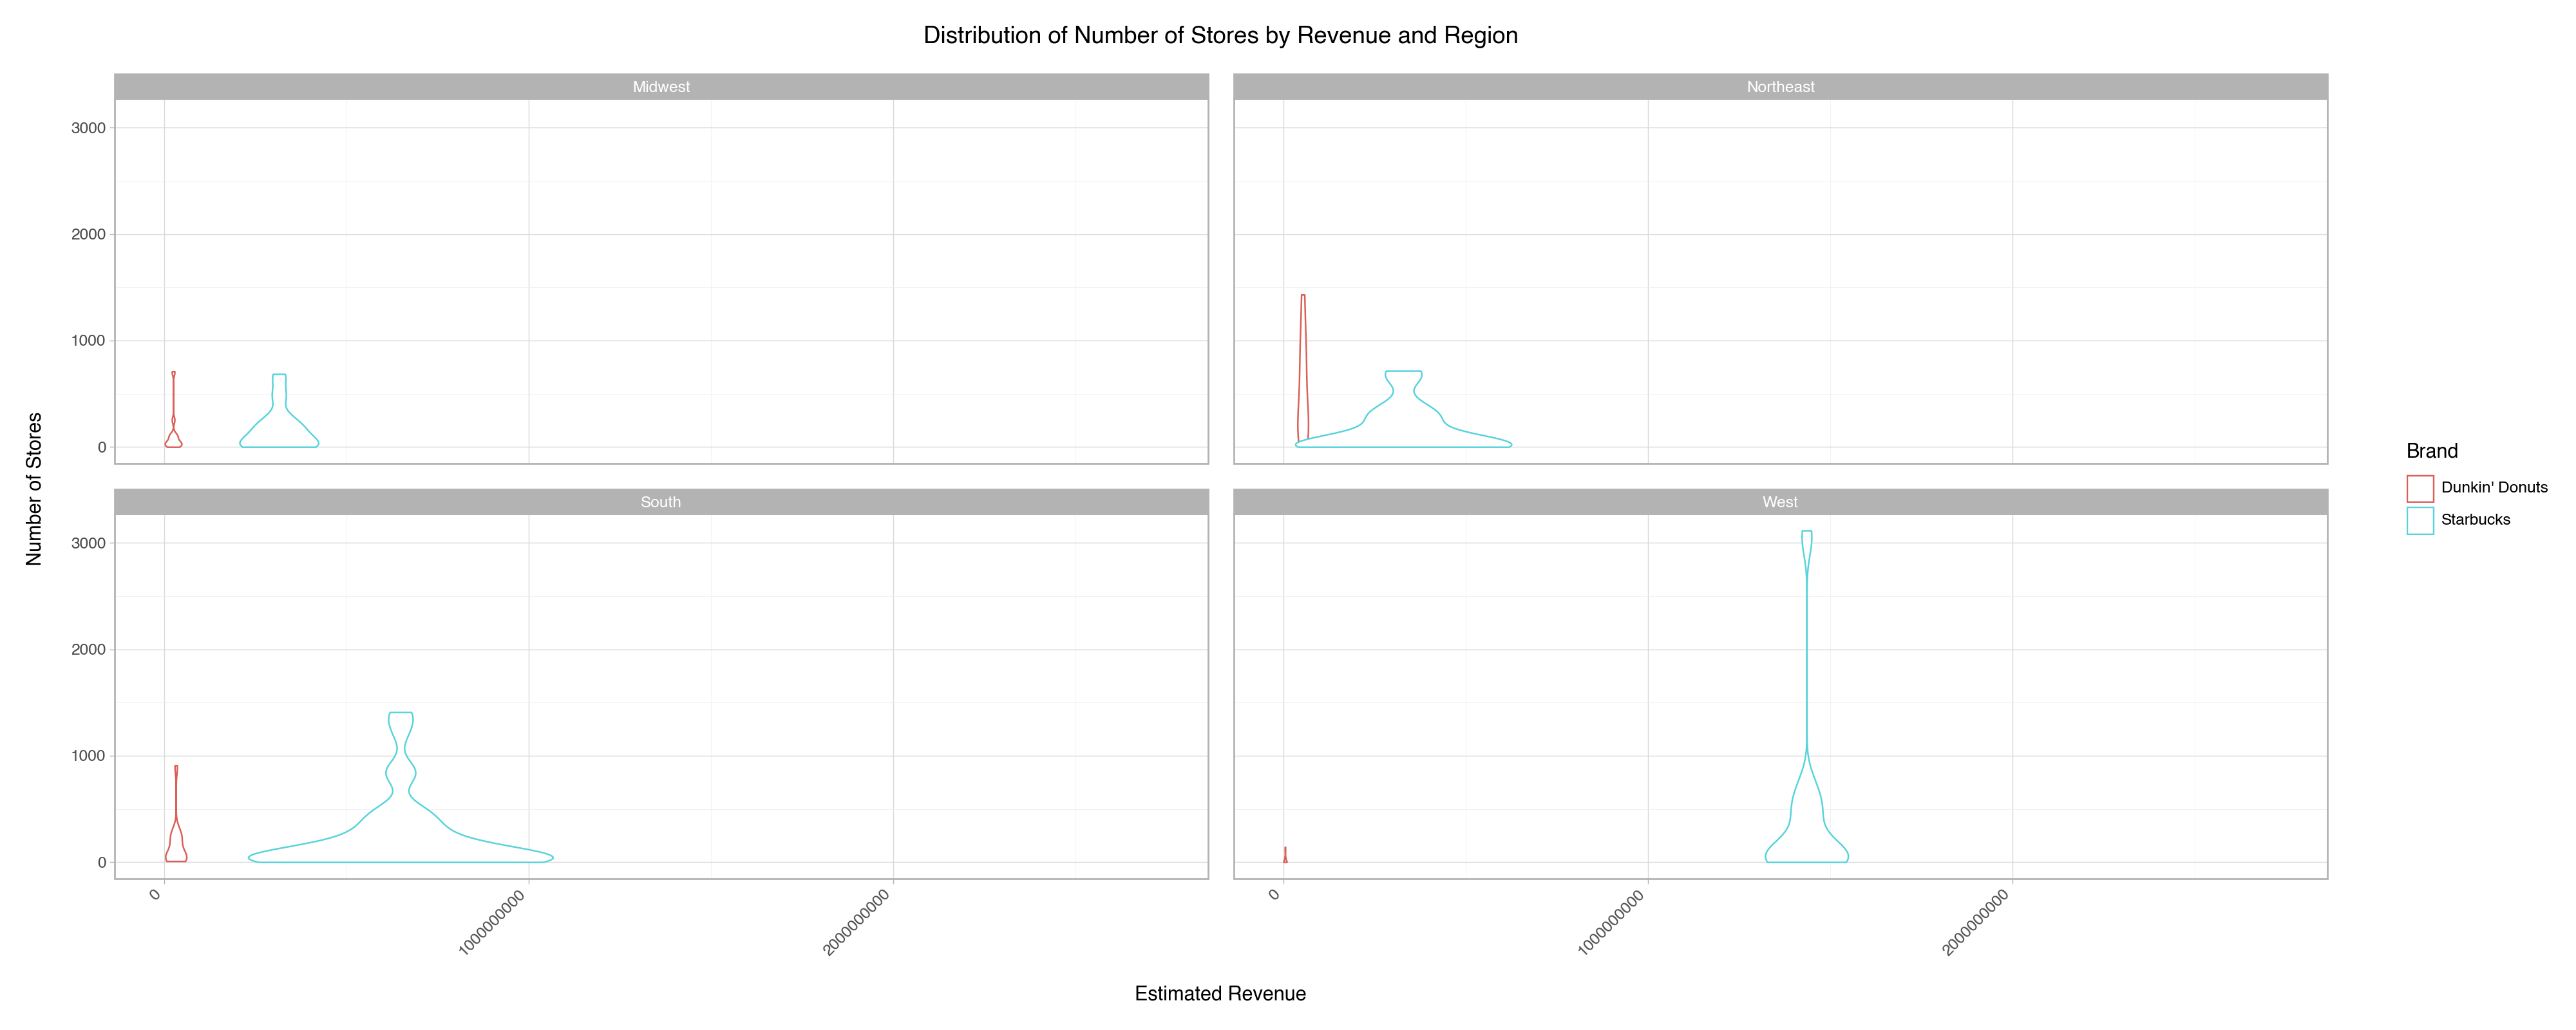

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_store_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", attrs={"class": "wpr-table"})

    if table is None:
        print("Table not found")
        return None

    company_name = url.split('/')[-1].replace('-by-state', '').replace('-', ' ').title()

    rows = []

    for row in table.find_all("tr")[1:]:
        cells = row.find_all("td")
        if len(cells) > 0:
            state = row.find('th').get_text(strip=True)
            locations = [cell.get_text(strip=True).replace(',', '') for cell in cells]

            for i, loc in enumerate(locations):
                try:
                    year = str(2024 - i)
                    store_count = int(loc)
                except ValueError:
                    store_count = 0

                rows.append({
                    'State': state,
                    'Year': year,
                    f'{company_name} Locations': store_count
                })

    df = pd.DataFrame(rows)

    return df



In [16]:
aldi_data = scrape_store_data("https://worldpopulationreview.com/state-rankings/aldi-by-state")

aldi_data

,State,Year,Aldi Locations
0,Florida,2024,218
1,Florida,2023,206
2,Illinois,2024,216
3,Illinois,2023,211
4,Ohio,2024,164
...,...,...,...
99,Washington,2023,0
100,Wyoming,2024,0
101,Wyoming,2023,0
102,United States,2024,2392


,State,Year,Starbucks Stores Locations
0,California,2024,3080
1,California,2023,2959
2,California,2022,3117
3,Texas,2024,1346
4,Texas,2023,1215


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 50 rows containing non-finite values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals
/opt/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


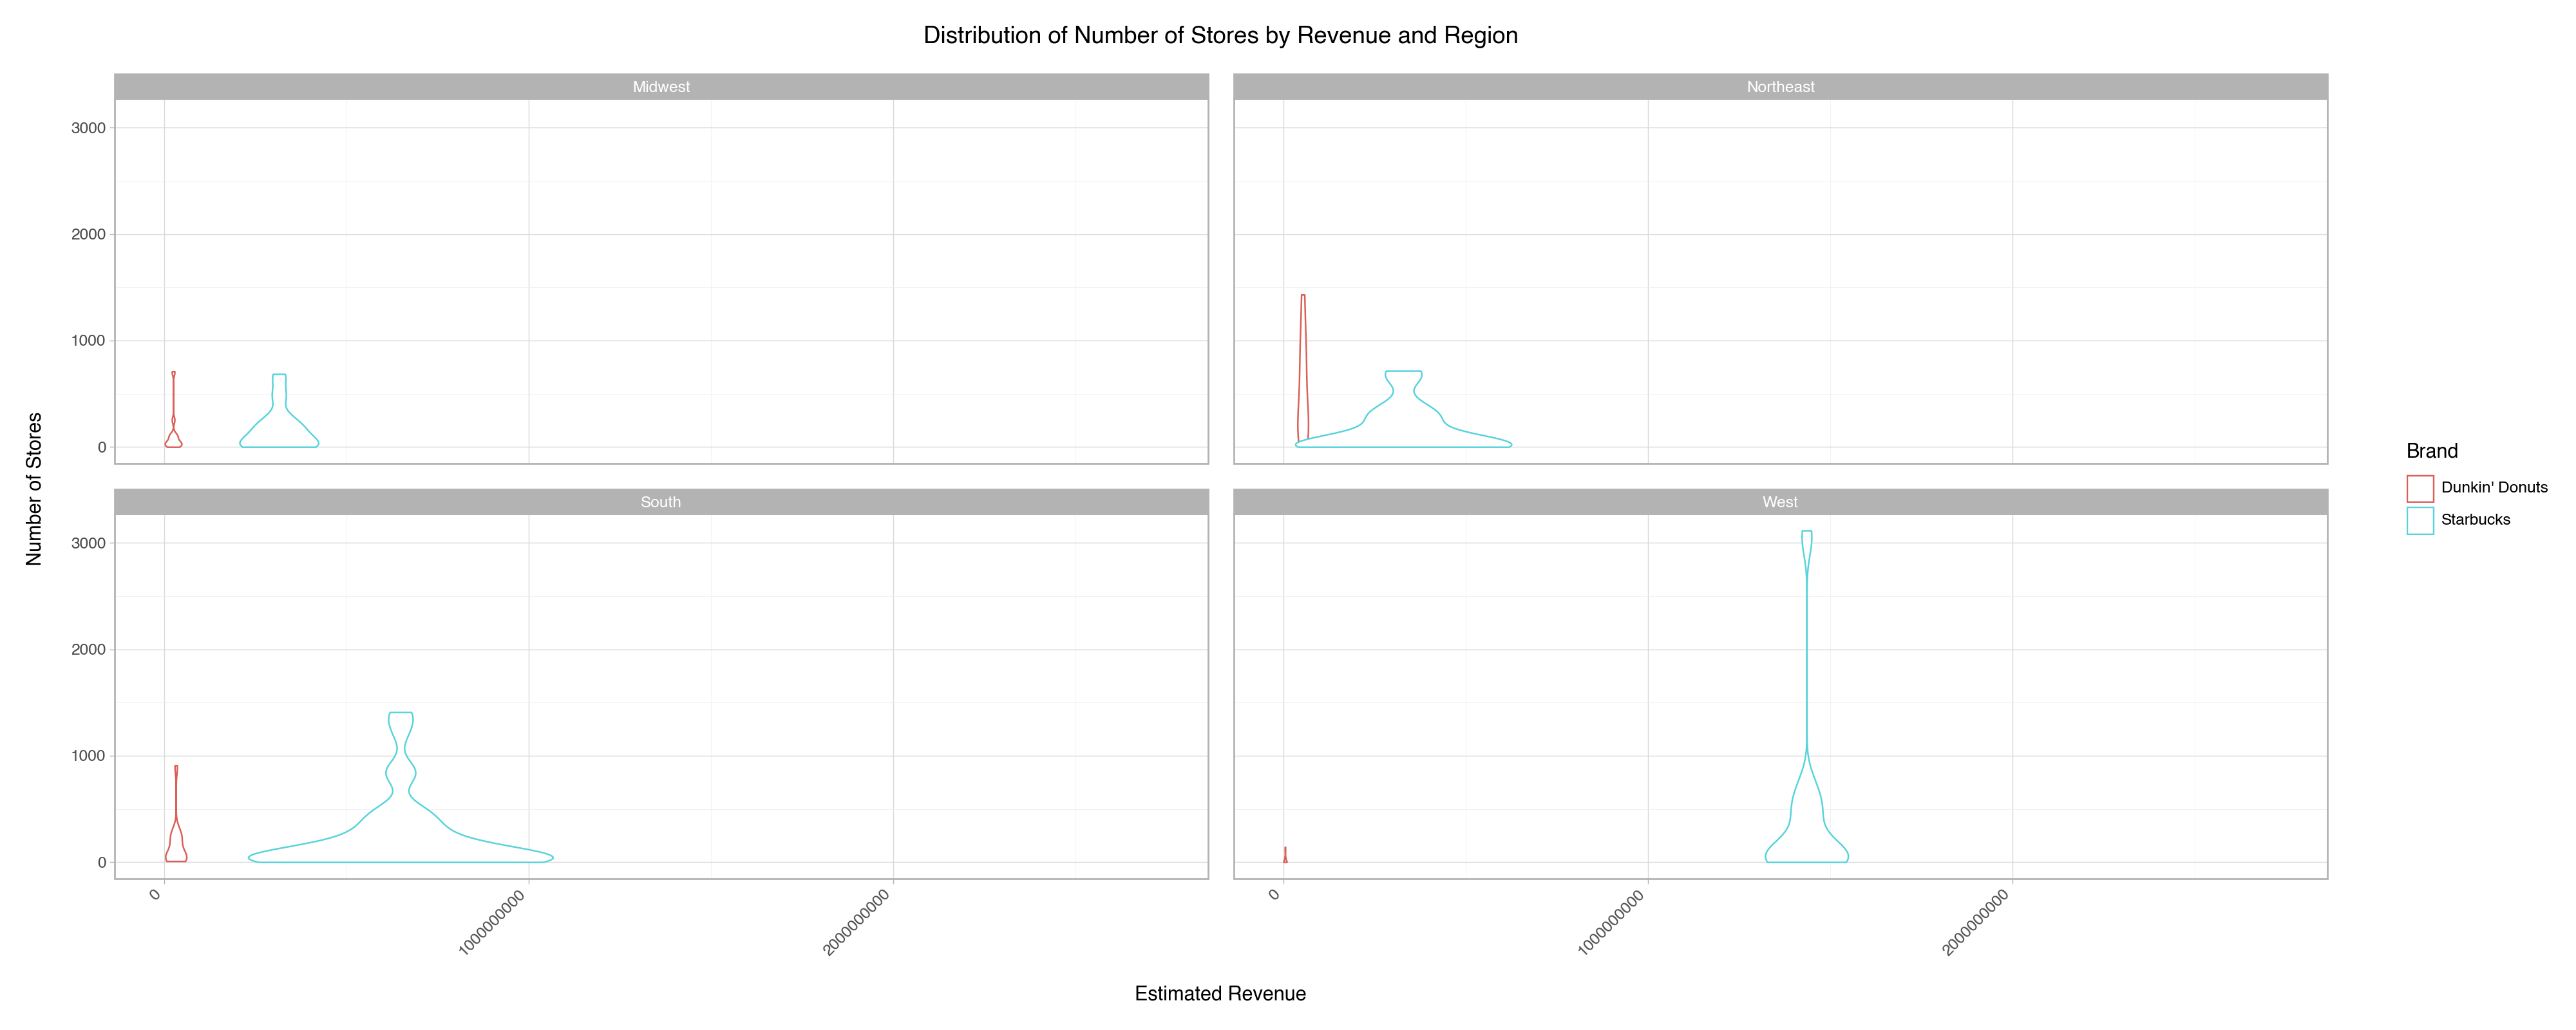

In [54]:
starbucks_url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"

starbucks_data = scrape_store_data(starbucks_url)

starbucks_data.head()

Sources:


[https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state://](https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state://)

[https://worldpopulationreview.com/state-rankings/aldi-by-state](https://worldpopulationreview.com/state-rankings/aldi-by-state)

[https://stockanalysis.com/stocks/sbux/revenue/](https://stockanalysis.com/stocks/sbux/revenue/)


[https://stories.starbucks.com/press/2024/starbucks-reports-preliminary-q4-and-full-fiscal-year-2024-results/](https://stories.starbucks.com/press/2024/starbucks-reports-preliminary-q4-and-full-fiscal-year-2024-results/)

[https://www.zippia.com/dunkin-donuts-careers-554008/revenue/](https://www.zippia.com/dunkin-donuts-careers-554008/revenue/)

[https://companiesmarketcap.com/dunkin-brands/revenue/](https://companiesmarketcap.com/dunkin-brands/revenue/)


[https://stackoverflow.com/questions/68922339/how-to-solve-dataframe-to-numeric-error-python](https://stackoverflow.com/questions/68922339/how-to-solve-dataframe-to-numeric-error-python)
